In [17]:
# Importar bibliotecas y funciones

import csv
import pandas as pd
from prince import MCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import plotly.express as px
import streamlit as st
import re
import prince
import unicodedata
import unidecode
from sklearn.preprocessing import OneHotEncoder
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA
from adjustText import adjust_text
import matplotlib.patheffects as path_effects
from matplotlib.lines import Line2D
from adjustText import adjust_text
import warnings
import os
from tabulate import tabulate
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances


In [18]:
# Ruta completa del archivo
ruta_archivo = r'C:\Users\Judith.Rodriguez\DatasetNuevo\ComparendosNS_limpio.csv'

# Leer el archivo correctamente
df = pd.read_csv(ruta_archivo, sep=';', encoding='utf-8-sig', dtype=str)

# Verificar número de registros cargados
print("Número de filas cargadas:", df.shape[0])

Número de filas cargadas: 80190


In [19]:
#PROCESAMIENTO DE DATOS
# Inspeccionar valores únicos y frecuencia para cada columna
print(df['COMPORTAMIENTO'].value_counts())
print(df['FECHA_CREACION'].value_counts())
print(df['CUADRANTE_HECHOS'].value_counts())
print(df['TIPO_LUGAR'].value_counts())
print(df['LOCALIDAD'].value_counts())
print(df['BARRIO_HECHOS'].value_counts())
print(df['DIRECCION_HECHOS'].value_counts())
print(df['PAIS_RESIDE'].value_counts())
print(df['DTO_RESIDE'].value_counts())
print(df['MUNI_RESIDE'].value_counts())
print(df['DIRECCION_RESIDE'].value_counts())
print(df['RAZÓN SOCIAL'].value_counts())
print(df['ACTIVIDAD_COMERCIAL'].value_counts())
print(df['TITULO'].value_counts())
print(df['CAPITULO'].value_counts())
print(df['ARTICULO'].value_counts())
print(df['APELACION'].value_counts())
print(df['DESCRIPCION_ESTADO'].value_counts())
print(df['APLICA_MEDIDA'].value_counts())
print(df['DESCRIPCION_MEDIDA'].value_counts())
print(df['ESTADO_MEDIDA'].value_counts())
print(df['TIPO_BIEN'].value_counts())
print(df['CLASE_BIEN'].value_counts())

COMPORTAMIENTO
Num. 12 - Ingresar y salir de las estaciones o portales por sitios distintos a las puertas designadas para el efecto                                  68407
Num. 11 - Realizar necesidades fisiológicas en el espacio público                                                                                      3503
Num. 1 - Irrespetar  a las autoridades de policía                                                                                                      1606
Num. 5 - Ofrecer cualquier tipo de resistencia a la aplicación de una medida o la utilización de un medio de policía                                   1352
Num. 16 - Desarrollar la actividad económica sin cumplir cualquiera de los requisitos establecidos en la normatividad vigente                          1308
Num. 1 - Obstruir por cualquier medio la ciclo ruta o carril exclusivo para las bicicletas.                                                             909
Num. 4 - Quebrantar los horarios establecidos por

In [20]:
# Eliminar filas con valores nulos
df.dropna(subset=['COMPORTAMIENTO', 'FECHA', 'CUADRANTE_HECHOS', 'TIPO_LUGAR', 'LOCALIDAD', 'BARRIO_HECHOS', 'DIRECCION_HECHOS'], inplace=True)
df.dropna(subset=['PAIS_RESIDE', 'DTO_RESIDE', 'MUNI_RESIDE', 'DIRECCION_RESIDE', 'RAZÓN SOCIAL', 'ACTIVIDAD_COMERCIAL', 'TITULO'], inplace=True)
df.dropna(subset=['CAPITULO', 'ARTICULO', 'APELACION', 'DESCRIPCION_ESTADO', 'APLICA_MEDIDA', 'DESCRIPCION_MEDIDA', 'ESTADO_MEDIDA', 'TIPO_BIEN', 'CLASE_BIEN'], inplace=True)

In [21]:
print("Tamaño después de eliminar nulos:", df.shape)

Tamaño después de eliminar nulos: (80164, 54)


In [22]:
# Estandarizar valores: convertir todo a minúsculas y quitar espacios extra
df['COMPORTAMIENTO'] = df['COMPORTAMIENTO'].str.lower().str.strip()
df['FECHA_CREACION'] = df['FECHA_CREACION'].str.lower().str.strip()
df['CUADRANTE_HECHOS'] = df['CUADRANTE_HECHOS'].str.lower().str.strip()
df['TIPO_LUGAR'] = df['TIPO_LUGAR'].str.lower().str.strip()
df['LOCALIDAD'] = df['LOCALIDAD'].str.lower().str.strip()
df['BARRIO_HECHOS'] = df['BARRIO_HECHOS'].str.lower().str.strip()
df['DIRECCION_HECHOS'] = df['DIRECCION_HECHOS'].str.lower().str.strip()
df['PAIS_RESIDE'] = df['PAIS_RESIDE'].str.lower().str.strip()
df['DTO_RESIDE'] = df['DTO_RESIDE'].str.lower().str.strip()
df['MUNI_RESIDE'] = df['MUNI_RESIDE'].str.lower().str.strip()
df['DIRECCION_RESIDE'] = df['DIRECCION_RESIDE'].str.lower().str.strip()
df['RAZÓN SOCIAL'] = df['RAZÓN SOCIAL'].str.lower().str.strip()
df['ACTIVIDAD_COMERCIAL'] = df['ACTIVIDAD_COMERCIAL'].str.lower().str.strip()
df['TITULO'] = df['TITULO'].str.lower().str.strip()
df['CAPITULO'] = df['CAPITULO'].str.lower().str.strip()
df['ARTICULO'] = df['ARTICULO'].str.lower().str.strip()
df['APELACION'] = df['APELACION'].str.lower().str.strip()
df['DESCRIPCION_ESTADO'] = df['DESCRIPCION_ESTADO'].str.lower().str.strip()
df['APLICA_MEDIDA'] = df['APLICA_MEDIDA'].str.lower().str.strip()
df['DESCRIPCION_MEDIDA'] = df['DESCRIPCION_MEDIDA'].str.lower().str.strip()
df['ESTADO_MEDIDA'] = df['ESTADO_MEDIDA'].str.lower().str.strip()
df['TIPO_BIEN'] = df['TIPO_BIEN'].str.lower().str.strip()
df['CLASE_BIEN'] = df['CLASE_BIEN'].str.lower().str.strip()

In [23]:
# Reemplazar valores erróneos o fuera de rango
df['COMPORTAMIENTO'] = df['COMPORTAMIENTO'].replace({'comportamiento_incorrecta': 'desconocida'})
df['FECHA_CREACION'] = df['FECHA_CREACION'].replace({'fecha_incorrecta': 'desconocida'})
df['CUADRANTE_HECHOS'] = df['CUADRANTE_HECHOS'].replace({'cuadrante_incorrecto': 'desconocido'})
df['TIPO_LUGAR'] = df['TIPO_LUGAR'].replace({'tipo_incorrecto': 'desconocido'})
df['LOCALIDAD'] = df['LOCALIDAD'].replace({'localidad_incorrecta': 'desconocida'})
df['DIRECCION_HECHOS'] = df['DIRECCION_HECHOS'].replace({'direccion_incorrecta': 'desconocida'})
df['PAIS_RESIDE'] = df['PAIS_RESIDE'].replace({'pais_incorrecto': 'desconocido'})
df['DTO_RESIDE'] = df['DTO_RESIDE'].replace({'dto_incorrecto': 'desconocido'})
df['MUNI_RESIDE'] = df['MUNI_RESIDE'].replace({'municipio_incorrecto': 'desconocido'})
df['DIRECCION_RESIDE'] = df['DIRECCION_RESIDE'].replace({'direccion_incorrecta': 'desconocido'})
df['RAZÓN SOCIAL'] = df['RAZÓN SOCIAL'].replace({'razonsocial_incorrecta': 'desconocida'})
df['ACTIVIDAD_COMERCIAL'] = df['ACTIVIDAD_COMERCIAL'].replace({'actividadcomercial_incorrecta': 'desconocida'})
df['TITULO'] = df['TITULO'].replace({'titulo_incorrecto': 'desconocido'})
df['CAPITULO'] = df['CAPITULO'].replace({'capitulo_incorrecto': 'desconocido'})
df['ARTICULO'] = df['ARTICULO'].replace({'articulo_incorrecto': 'desconocido'})
df['APELACION'] = df['APELACION'].replace({'apelacion_incorrecta': 'desconocida'})
df['DESCRIPCION_ESTADO'] = df['DESCRIPCION_ESTADO'].replace({'descripcionestado_incorrecta': 'desconocida'})
df['APLICA_MEDIDA'] = df['APLICA_MEDIDA'].replace({'aplicacionmedida_incorrecta': 'desconocida'})
df['DESCRIPCION_MEDIDA'] = df['DESCRIPCION_MEDIDA'].replace({'descripcionmedida_incorrecta': 'desconocida'})
df['ESTADO_MEDIDA'] = df['ESTADO_MEDIDA'].replace({'estadomedida_incorrecto': 'desconocido'})
df['TIPO_BIEN'] = df['TIPO_BIEN'].replace({'tipobien_incorrecta': 'desconocido'})
df['CLASE_BIEN'] = df['CLASE_BIEN'].replace({'clasebien_incorrecto': 'desconocido'})



In [24]:
# Detectar valores atípicos
# Verificar longitudes inusuales en las variables
df[df['COMPORTAMIENTO'].str.len() > 100]  # Ejemplo de largo inusual
df[df['FECHA_CREACION'].str.len() > 100]
df[df['CUADRANTE_HECHOS'].str.len() > 100] 
df[df['TIPO_LUGAR'].str.len() > 100]
df[df['LOCALIDAD'].str.len() > 100] 
df[df['BARRIO_HECHOS'].str.len() > 100]
df[df['DIRECCION_HECHOS'].str.len() > 100] 
df[df['PAIS_RESIDE'].str.len() > 100]
df[df['DTO_RESIDE'].str.len() > 100]
df[df['MUNI_RESIDE'].str.len() > 100] 
df[df['DIRECCION_RESIDE'].str.len() > 100]
df[df['RAZÓN SOCIAL'].str.len() > 100]
df[df['ACTIVIDAD_COMERCIAL'].str.len() > 100]  
df[df['TITULO'].str.len() > 100]
df[df['CAPITULO'].str.len() > 100]
df[df['ARTICULO'].str.len() > 100]  
df[df['APELACION'].str.len() > 100]
df[df['DESCRIPCION_ESTADO'].str.len() > 100]
df[df['APLICA_MEDIDA'].str.len() > 100]  
df[df['DESCRIPCION_MEDIDA'].str.len() > 100]
df[df['ESTADO_MEDIDA'].str.len() > 100]
df[df['TIPO_BIEN'].str.len() > 100]  
df[df['CLASE_BIEN'].str.len() > 100]

,ID_HECHOS,EXPEDIENTE,FECHA_CREACION,FECHA,LOCALIDAD,DIRECCION_HECHOS,BARRIO_HECHOS,TIPO_LUGAR,CUADRANTE_HECHOS,ID_TIPO_DOC,...,INCAUTACION,TIPO_BIEN,CLASE_BIEN,MARCA,CANTIDAD,UNIDAD,VALOR,NUMERO_ARTICULO,NUMERO_NUMERAL,NUMERO_LITERAL


In [25]:
df['FECHA_CREACION'] = pd.to_datetime(df['FECHA_CREACION'])

In [26]:
df.dtypes

ID_HECHOS                      object
EXPEDIENTE                     object
FECHA_CREACION         datetime64[ns]
FECHA                          object
LOCALIDAD                      object
DIRECCION_HECHOS               object
BARRIO_HECHOS                  object
TIPO_LUGAR                     object
CUADRANTE_HECHOS               object
ID_TIPO_DOC                    object
TIPO_DOC                       object
IDENTIFICACION                 object
INFRACTOR                      object
PAIS_RESIDE                    object
ID_PAIS_RESIDE                 object
DTO_RESIDE                     object
MUNI_RESIDE                    object
ID_MUNI_RESIDE                 object
DIRECCION_RESIDE               object
APELACION                      object
EDAD                           object
RAZÓN SOCIAL                   object
ACTIVIDAD_COMERCIAL            object
NIT                            object
DIRECCION_RAZON                object
TIPO_DOC_REP                   object
IDENTIFICACI

In [27]:
# ANALÍTICA DESCRIPTIVA

# SEPARACIÓN DE LA VARIABLES FECHA: hora, día y mes

# 'FECHA' es la columna con el valor de fecha y hora
df['FECHA_CREACION'] = pd.to_datetime(df['FECHA_CREACION'])  # la columna está en formato datetime

# Separar la fecha y la hora
df['FECHA_SOLAMENTE'] = df['FECHA_CREACION'].dt.date  # Para obtener solo la fecha
df['HORA_SOLAMENTE'] = df['FECHA_CREACION'].dt.hour  # Para obtener solo la hora

# Extraer el mes y el día de la semana para el análisis
df['MES'] = df['FECHA_CREACION'].dt.month  # Mes
df['DIA_SEMANA'] = df['FECHA_CREACION'].dt.weekday  # Día de la semana (0=lunes, 6=domingo)
df['HORA'] = df['FECHA_CREACION'].dt.hour  # Hora

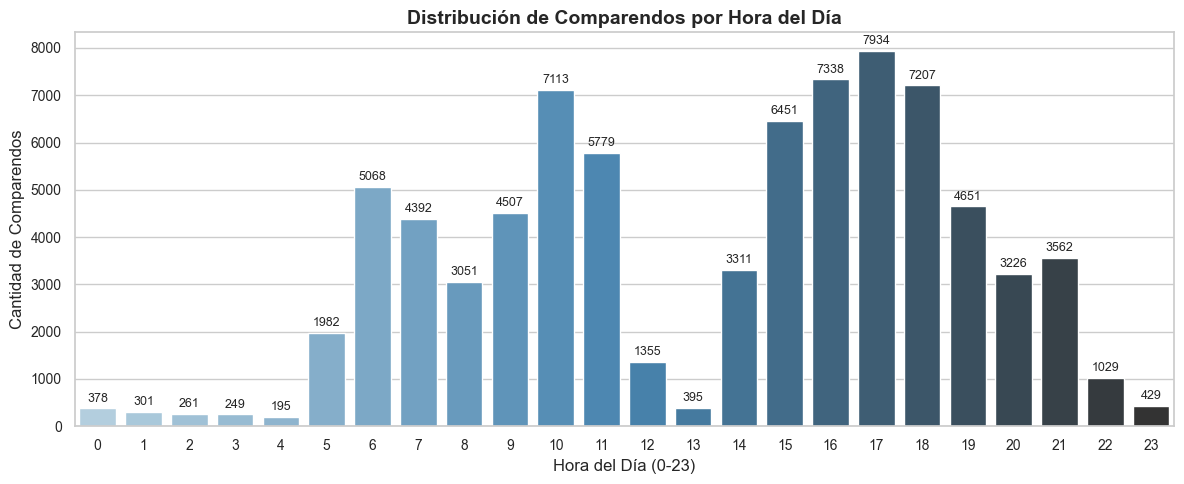

In [28]:
# Convertir la columna FECHA a formato datetime
df["FECHA_CREACION"] = pd.to_datetime(df["FECHA_CREACION"], errors="coerce")

# Extraer la hora del día
df["HORA"] = df["FECHA_CREACION"].dt.hour

# Obtener el conteo de comparendos por hora
comparendos_por_hora = df["HORA"].value_counts().sort_index()

# Crear figura
plt.figure(figsize=(12, 5))
sns.set(style="whitegrid")

# Graficar comparendos por hora
sns.barplot(
    x=comparendos_por_hora.index,
    y=comparendos_por_hora.values,
    hue=comparendos_por_hora.index,
    palette="Blues_d",
    legend=False
)

# Ajustar etiquetas y título
plt.title("Distribución de Comparendos por Hora del Día", fontsize=14, fontweight="bold")
plt.xlabel("Hora del Día (0-23)", fontsize=12)
plt.ylabel("Cantidad de Comparendos", fontsize=12)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)

# Agregar etiquetas en las barras
for i, v in enumerate(comparendos_por_hora.values):
    plt.text(i, v + max(comparendos_por_hora.values) * 0.01, str(v), ha='center', va='bottom', fontsize=9)

# Guardar la imagen como archivo PNG
plt.tight_layout()
plt.savefig("comparendos_por_hora.png", dpi=300)

# Mostrar gráfico
plt.show()


In [29]:
print("Total registros:", len(df))
print("Total comparendos con hora válida:", df['HORA'].notna().sum())
print("Suma total en comparendos_por_hora:", comparendos_por_hora.sum())

Total registros: 80164
Total comparendos con hora válida: 80164
Suma total en comparendos_por_hora: 80164


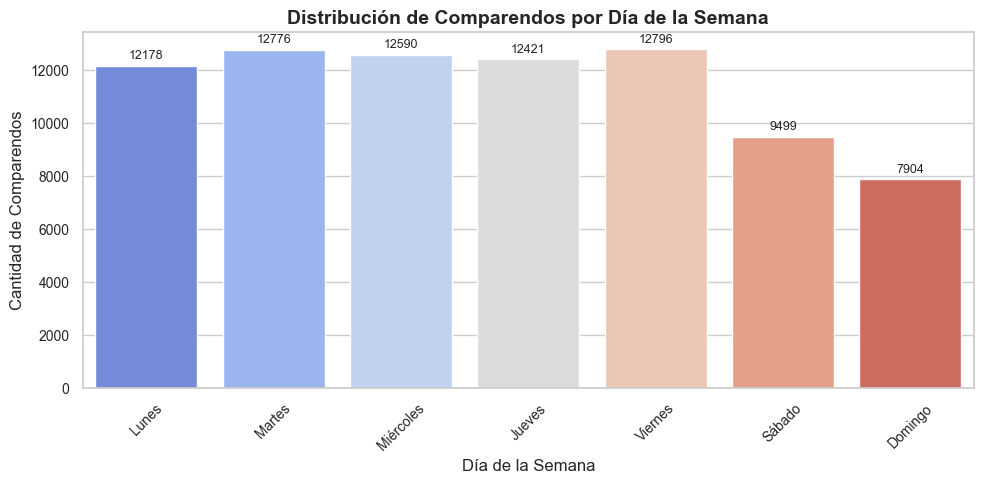

In [30]:
# Convertir la columna FECHA a formato datetime
df["FECHA_CREACION"] = pd.to_datetime(df["FECHA_CREACION"], errors="coerce")

# Extraer el día de la semana (1 = Lunes, 7 = Domingo)
df["DIA_SEMANA"] = df["FECHA_CREACION"].dt.dayofweek + 1

# Obtener el conteo de comparendos por día de la semana
comparendos_por_dia = df["DIA_SEMANA"].value_counts().sort_index()

# Nombres de los días de la semana
dias_semana = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]

# Crear figura
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

# Graficar comparendos por día de la semana
sns.barplot(
    x=dias_semana,
    y=comparendos_por_dia.values,
    hue=dias_semana,  # Para evitar advertencias
    palette="coolwarm",
    legend=False
)

# Ajustar etiquetas y título
plt.title("Distribución de Comparendos por Día de la Semana", fontsize=14, fontweight="bold")
plt.xlabel("Día de la Semana", fontsize=12)
plt.ylabel("Cantidad de Comparendos", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Agregar etiquetas en las barras
for i, v in enumerate(comparendos_por_dia.values):
    plt.text(i, v + max(comparendos_por_dia.values) * 0.01, str(v), ha='center', va='bottom', fontsize=9)

# Guardar la imagen como archivo PNG
plt.tight_layout()
plt.savefig("comparendos_por_dia_semana.png", dpi=300)

# Mostrar gráfico
plt.show()


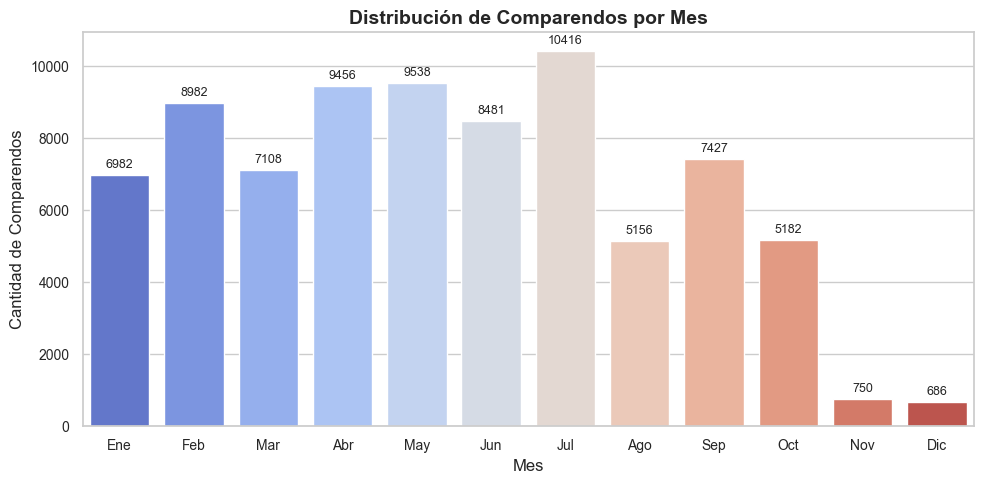

In [31]:
# Convertir la columna FECHA a formato datetime
df["FECHA_CREACION"] = pd.to_datetime(df["FECHA_CREACION"], errors="coerce")

# Extraer el mes
df["MES"] = df["FECHA_CREACION"].dt.month

# Obtener el conteo de comparendos por mes
comparendos_por_mes = df["MES"].value_counts().sort_index()

# Nombres de los meses del año
meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]

# Crear figura
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

# Graficar comparendos por mes
sns.barplot(
    x=comparendos_por_mes.index.astype(str),
    y=comparendos_por_mes.values,
    hue=comparendos_por_mes.index.astype(str),
    palette="coolwarm",
    legend=False
)

# Ajustar etiquetas y título
plt.title("Distribución de Comparendos por Mes", fontsize=14, fontweight="bold")
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Cantidad de Comparendos", fontsize=12)

# Asegurar que los meses estén correctamente alineados
plt.xticks(ticks=range(12), labels=meses, fontsize=10)
plt.yticks(fontsize=10)

# Agregar etiquetas en las barras
for i, v in enumerate(comparendos_por_mes.values):
    plt.text(i, v + max(comparendos_por_mes.values) * 0.01, str(v), ha='center', va='bottom', fontsize=9)

# Guardar la imagen como archivo PNG
plt.tight_layout()
plt.savefig("comparendos_por_mes.png", dpi=300)

# Mostrar gráfico
plt.show()


In [32]:
mapeo_comportamiento = {
        "Num. 12 - Ingresar y salir de las estaciones o portales por sitios distintos a las puertas designadas para el efecto": "Ingreso indebido estaciones",
    "Num. 11 - Realizar necesidades fisiológicas en el espacio público": "Necesidades fisiológicas en público",
    "Num. 1 - Irrespetar a las autoridades de policía": "Irrespeto autoridad",
    "Num. 16 - Desarrollar la actividad económica sin cumplir cualquiera de los requisitos establecidos en la normatividad vigente": "Actividad económica sin requisitos",
    "Num. 5 - Ofrecer cualquier tipo de resistencia a la aplicación de una medida o la utilización de un medio de policía": "Resistencia a la medida",
    "Num. 4 - Quebrantar los horarios establecidos por el Alcalde": "Incumplimiento de horarios",
    "Num. 1 - Obstruir por cualquier medio la ciclo ruta o carril exclusivo para las bicicletas": "Obstrucción cicloruta",
    "Num. 8 - Portar sustancias prohibidas en el espacio público": "Portar sustancias prohibidas",
    "Num. 2 - Lanzar objetos que puedan causar daño o sustancias peligrosas a personas": "Lanzamiento peligroso",
    "Num. 9 - Obstaculizar o impedir la movilidad o el flujo de usuarios en estos sistemas": "Obstrucción movilidad",
    "Num. 3 - Permitir el consumo de tabaco y/o sus derivados en lugares no autorizados por la ley y la normatividad vigente": "Consumo indebido tabaco",
    "Num. 4 - Amenazar con causar un daño físico a personas por cualquier medio": "Amenaza de daño físico",
    "Num. 10 - Propiciar la ocupación indebida del espacio público": "Ocupación indebida espacio público",
    "Num. 5 - Desarrollar actividades diferentes a las registradas en el objeto social de la matrícula o registro mercantil": "Actividad no registrada",
    "Lit. d - Fumar en lugares prohibidos": "Fumar en zonas prohibidas",
    "Num. 3 - Agredir físicamente a personas por cualquier medio": "Agresión física",
    "Num. 16 - Irrespetar a las autoridades del sistema": "Irrespeto autoridades del sistema",
    "Lit. b - Realizar actos sexuales o de exhibicionismo que generen molestia a la comunidad": "Exhibicionismo público",
    "Num. 6 - Agredir por cualquier medio o lanzar objetos que puedan causar daño o sustancias que representen peligro a las autoridades de policía": "Agresión a autoridades",
    "Num. 4 - Ocupar el espacio público en violación de las normas vigentes": "Ocupación indebida espacio público",
    "Num. 5 - Dejar las basuras esparcidas fuera de sus bolsas o contenedores una vez efectuado el reciclaje": "Basura fuera de lugar",
    "Num. 2 - Auspiciar riñas o incurrir en confrontaciones violentas que puedan derivar en agresiones físicas o escándalos": "Auspiciar riñas",
    "Num. 1 - Sacar la basura en horarios no autorizados por la empresa prestadora del servicio o en sitio diferente al lugar de residencia o domicilio": "Basura fuera de horario",
    "Num. 9 - Permitir o facilitar el consumo de drogas o sustancias prohibidas por la normatividad vigente o las autoridades competentes": "Facilitar consumo ilegal",
    "Num. 7 - Utilizar inadecuadamente el sistema de número único de seguridad y emergencia": "Uso indebido de emergencia",
    "Num. 3 - Generar ruidos o sonidos que afecten la tranquilidad de las personas o su entorno": "Generar ruidos molestos",
    "Num. 11 - Transportar escombros en medios no aptos ni adecuados": "Transporte inadecuado de escombros",
    "Num. 9 - Comercializar minerales sin el cumplimiento de los requisitos y permisos establecidos en la normatividad minera vigente": "Minería ilegal",
    "Num. 9 - Propiciar o contratar el transporte de escombros en medios no aptos ni adecuados": "Transporte inadecuado escombros",
    "Num. 2 - Modificar o alterar redes o instalaciones de servicios públicos": "Alteración servicios públicos",
    "Num. 2 - No usar los recipientes o demás elementos dispuestos para depositar la basura": "Manejo incorrecto de basura",
    "Art. 27 - Comportamientos que ponen en riesgo la vida e integridad": "Riesgo vida e integridad",
    "Num. 5 - Realizar quemas o incendios que afecten la convivencia en cualquier lugar público o privado o en sitios prohibidos": "Quema ilegal",
    "Num. 6 - Promover o facilitar el uso u ocupación del espacio público en violación de las normas y jurisprudencia constitucional vigente": "Uso indebido espacio público",
    "Num. 5 - No contar con un sistema de refrigeración que garantice el mantenimiento de la temperatura reglamentada para los productos": "Falta de refrigeración",
    "Num. 9 - No destruir en la fuente los envases de bebidas embriagantes": "No destrucción envases",
    "Art. 140 - Comportamientos contrarios al cuidado e integridad del espacio público": "Daño al espacio público",
    "Num. 6 - Permitir el ingreso de personas o elementos en un número superior a la capacidad del lugar": "Sobrecupo",
    "Num. 8 - No permitir el ingreso de las autoridades de policía en ejercicio de su función o actividad": "Obstrucción autoridad",
    "Num. 8 - No solicitar o no realizar el registro individual de equipo terminal móvil con su número de IMEI al momento de ser importado al país": "Falta de registro IMEI",
    "Num. 1 - En el vecindario o lugar de habitación urbana o rural: Perturbar o permitir que se afecte el sosiego con": "Perturbación vecinal"
}

In [33]:
def limpiar_texto(texto):
    # Aquí va la lógica para limpiar el texto
    # Por ejemplo, convertir a minúsculas, eliminar signos de puntuación, etc.
    return texto.lower().strip()

In [34]:
mapeo_limpio = {limpiar_texto(k): v for k, v in mapeo_comportamiento.items()}

Mapeados correctamente: 80164
No mapeados: 0


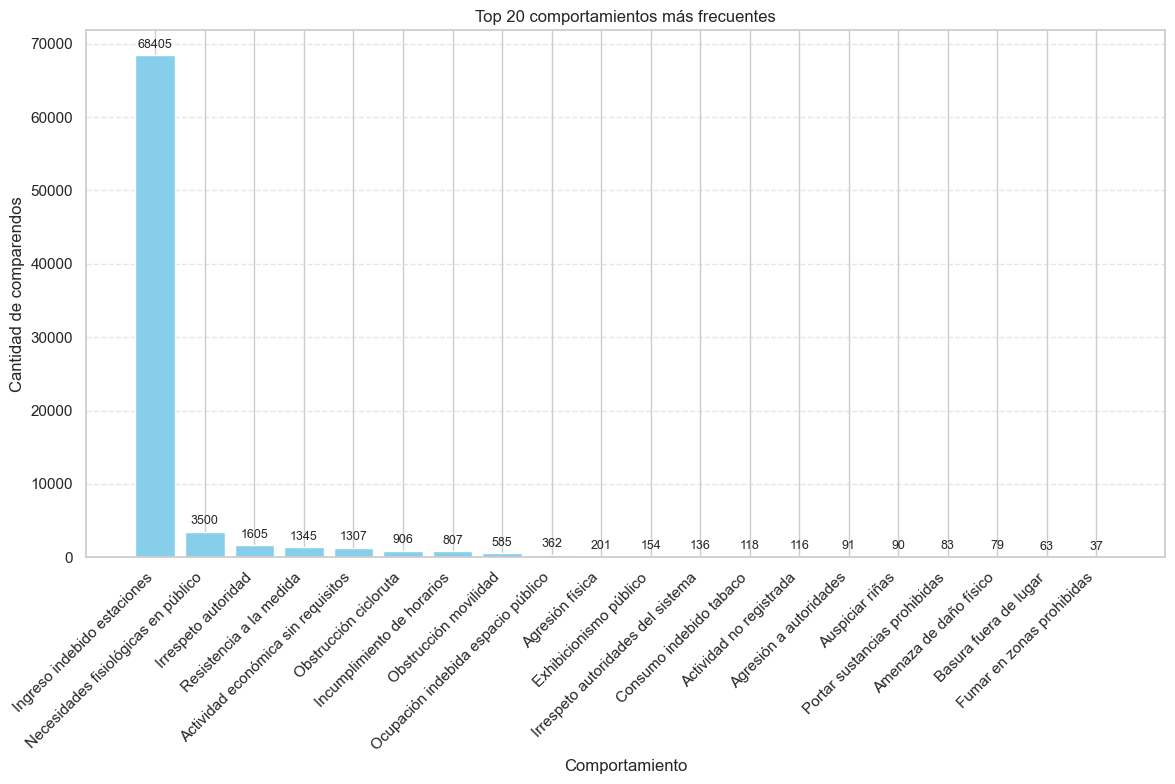

In [35]:
# Función de limpieza para normalizar textos
def limpiar_texto(texto):
    if pd.isna(texto):
        return ""
    texto = str(texto).lower()
    texto = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')  # quitar tildes
    texto = re.sub(r'[^a-z0-9\s]', '', texto)  # quitar signos de puntuación
    texto = re.sub(r'\s+', ' ', texto)  # quitar espacios extra
    return texto.strip()

# Limpiar columna 'COMPORTAMIENTO'
df['COMPORTAMIENTO_LIMPIO'] = df['COMPORTAMIENTO'].apply(limpiar_texto)

# Limpiar claves del diccionario
mapeo_limpio = {limpiar_texto(k): v for k, v in mapeo_comportamiento.items()}

# Mapear
df['COMPORTAMIENTO_CORTO'] = df['COMPORTAMIENTO_LIMPIO'].map(mapeo_limpio)

# Verificar cuántos se mapearon
print("Mapeados correctamente:", df['COMPORTAMIENTO_CORTO'].notna().sum())
print("No mapeados:", df['COMPORTAMIENTO_CORTO'].isna().sum())

# Filtrar los que sí están mapeados
df_mapeado = df.dropna(subset=['COMPORTAMIENTO_CORTO'])

# Conteo de frecuencias
conteo = df_mapeado['COMPORTAMIENTO_CORTO'].value_counts().head(20)

# Gráfica de barras con etiquetas de cantidad
plt.figure(figsize=(12, 8))
bars = plt.bar(conteo.index, conteo.values, color='skyblue')
plt.title('Top 20 comportamientos más frecuentes')
plt.xlabel('Comportamiento')
plt.ylabel('Cantidad de comparendos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Agregar cantidades sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

# Guardar imagen
plt.tight_layout()
plt.savefig("top20_comportamientos_frecuentes.png", dpi=300)

# Mostrar gráfico
plt.show()


In [36]:
df['LOCALIDAD'].unique()

array(['e-11 suba', 'e-7 bosa', 'e-5 usme', 'e-18 rafael uribe uribe',
       'e-10 engativa', 'e-12 barrios unidos', 'e-8 kennedy',
       'e-13 teusaquillo', 'e-3 santafe', 'e-15 antonio nariño',
       'e-9 fontibon', 'e-14 los martires', 'e-6 tunjuelito',
       'e-16 puente aranda', 'e-17 la candelaria', 'e-2 chapinero',
       'e-1 usaquen', 'e-19 ciudad bolivar', 'e-4 san cristobal',
       'no aplica'], dtype=object)

In [37]:
# Diccionario de corrección
correcciones_localidad = {
    'santa fé': 'santa fe',
    'santa fé.': 'santa fe',
    'san cristóbal': 'san cristobal',
    'suba.': 'suba',
    'desconocido': 'Desconocido',
    'ciudad bolivar': 'ciudad bolívar',
    'usaquén': 'usaquen',
    'usaquén.': 'usaquen',
    'no aplica': 'No Aplica'
    # Añade más correcciones si es necesario
}

In [38]:
df['LOCALIDAD'] = df['LOCALIDAD'].str.lower().str.strip()  # Normaliza texto
df['LOCALIDAD'] = df['LOCALIDAD'].replace(correcciones_localidad)

In [39]:
df['LOCALIDAD'] = df['LOCALIDAD'].str.title()

In [40]:
# Eliminar registros con LOCALIDAD 'Desconocido' o 'No Aplica'
df_filtrado = df[~df['LOCALIDAD'].isin(['Desconocido', 'No Aplica'])]


In [41]:
# Ordenar las localidades por frecuencia
orden_localidades = df_filtrado['LOCALIDAD'].value_counts().index

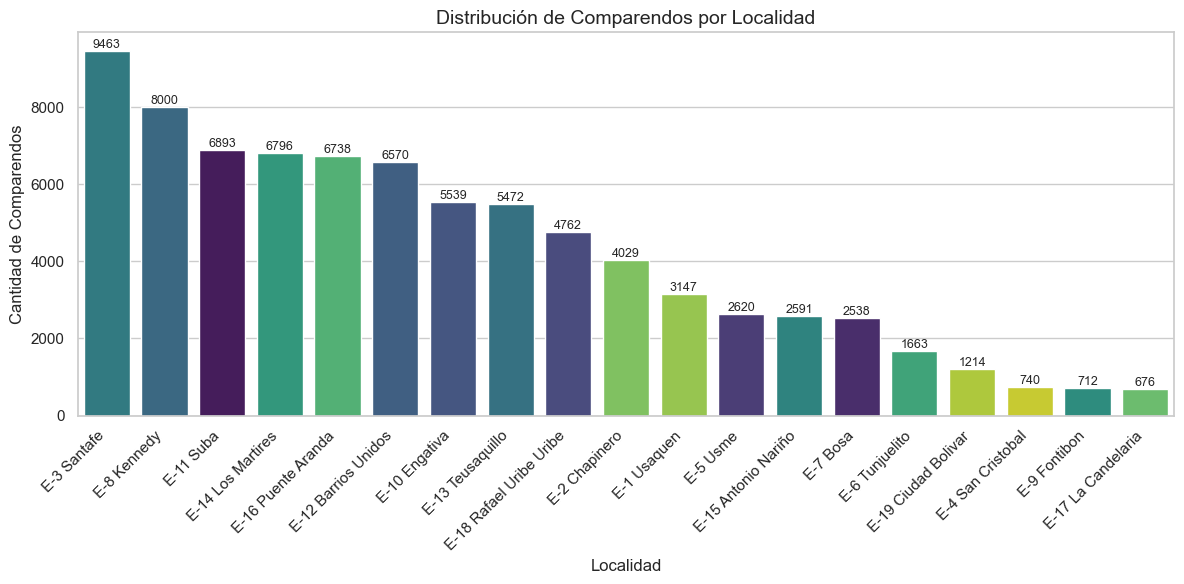

In [42]:
# Crear la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras
ax = sns.countplot(
    data=df_filtrado,
    x='LOCALIDAD',
    order=orden_localidades,
    hue='LOCALIDAD',
    palette='viridis',
    legend=False
)

# Agregar título y etiquetas
plt.title('Distribución de Comparendos por Localidad', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Localidad')
plt.ylabel('Cantidad de Comparendos')
plt.tight_layout()

# Añadir las cantidades encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 0.5,
        int(height),
        ha='center', va='bottom', fontsize=9
    )

# Guardar la imagen como archivo PNG
plt.savefig("comparendos_por_localidad.png", dpi=300)

# Mostrar gráfico
plt.show()


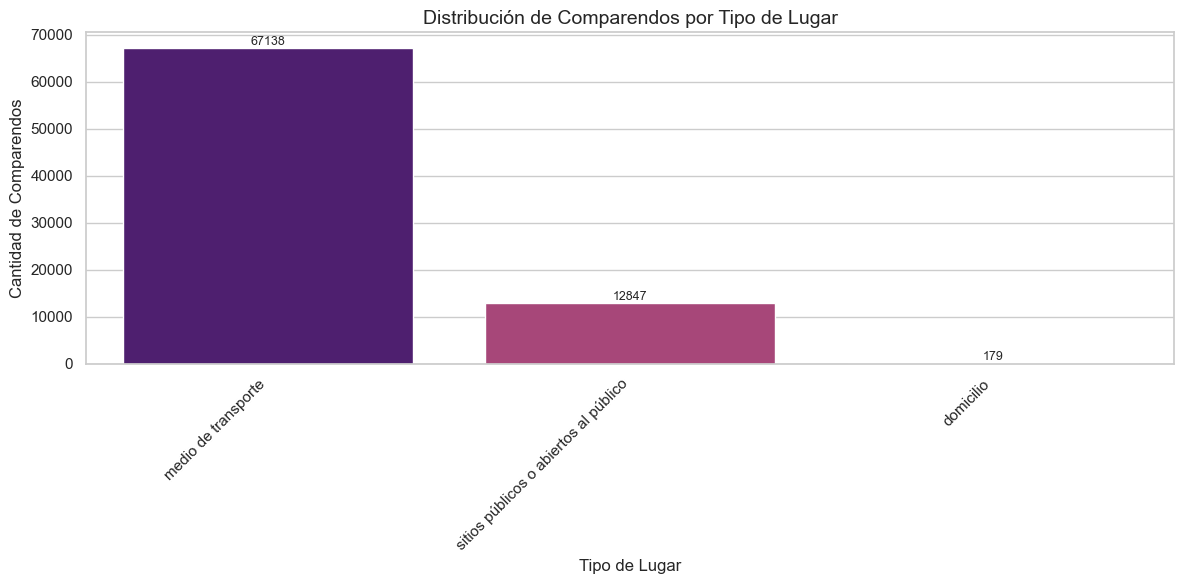

In [43]:
# Filtrar registros con valores válidos en TIPO_LUGAR (excluyendo 'desconocido' y 'no aplica')
df_filtrado = df[~df['TIPO_LUGAR'].str.lower().isin(['desconocido', 'no aplica'])]

# Ordenar los tipos de lugar por frecuencia
orden_lugares = df_filtrado['TIPO_LUGAR'].value_counts().index

# Crear el gráfico
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df_filtrado,
    x='TIPO_LUGAR',
    order=orden_lugares,
    hue='TIPO_LUGAR',
    palette='magma',
    legend=False
)

# Personalización del gráfico
plt.title('Distribución de Comparendos por Tipo de Lugar', fontsize=14)
plt.xlabel('Tipo de Lugar')
plt.ylabel('Cantidad de Comparendos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Añadir las cantidades encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 0.5,
        int(height),
        ha='center', va='bottom', fontsize=9
    )

# Guardar la imagen como archivo PNG
plt.savefig("comparendos_por_tipo_lugar.png", dpi=300)

# Mostrar gráfico
plt.show()


In [44]:

# Normalizamos el texto antes de la clasificación
df_filtrado['ACTIVIDAD_COMERCIAL'] = df_filtrado['ACTIVIDAD_COMERCIAL'].str.lower().str.strip()

# Eliminamos "comercial" y "ciiu" correctamente
df_filtrado = df_filtrado[~df_filtrado['ACTIVIDAD_COMERCIAL'].isin(["comercial", "ciiu"])]

def clasificar_actividad(act):
    if isinstance(act, str):
        act = act.lower().strip()

        # Venta de licor (antes Bebidas)
        if re.search(r'venta de licor|cigarreria|bar|billares|cerveza|expendio|consumo|alcohol|licoreria|en la cantina', act): 
            return "Venta de licor"

        # Alimentos y bebidas
        if re.search(r'restaurante|cafeteria|comidas rápidas|venta de comidas|comidas preparadas|venta de carnes|alimentos|mini mercado|venta de verduras|venta de frutas y verduras', act):
            return "Alimentos y bebidas"

        # Venta de productos
        if re.search(r'venta de accesorios|ferretería|comercio de motos y partes|venta de ferretería|venta de calzado|venta de cosas de animales|accesorios para celular y tecnología|venta flores y velas', act):  
            return "Venta de productos"

        # Servicios personales
        if re.search(r'gimnasio', act):  
            return "Servicios personales"

        # Industria textil
        if re.search(r'modistería|confección prendas de vestir|confección de ropa y venta', act):  
            return "Industria textil"

        # Mantenimiento y reparación
        if re.search(r'lavado de vehículos|lavadero de vehículos|tapicería|taller de pintura|taller reparación de vehículos|taller de motos|taller de mecánica para motos|latonería y pintura de vehículos|reparación técnica alternadores|reparación de termoking|taller y cambiadero de aceite', act):  
            return "Mantenimiento"

        # Servicios automotrices
        if re.search(r'parqueo de vehículos|parqueo de visitaxi|parqueadero|parqueadero bodega|montallantas', act):  
            return "Servicios automotrices"

        # Reciclaje y recuperación
        if re.search(r'reciclaje|reciclaje y recuperación|recicladora|bodega de reciclaje|transformación de material', act):  
            return "Reciclaje y recuperación"

        # Industria y manufactura
        if re.search(r'chatarrería|metalmecánica|fábrica de tornillos', act):  
            return "Industria y manufactura"

        # Construcción e infraestructura
        if re.search(r'compra y venta de materiales de construcción|venta de pólvora', act):  
            return "Industria y manufactura"

        # Servicio de hospedaje
        if re.search(r'servicio de estancia por horas|hospedaje día a día|residencia paga diario', act):  
            return "Servicio de hospedaje"

        # Misceláneos
        if re.search(r'papelería y miscelánea|piñatería|actividades de impresión|miscelánea variedades|avisos y polarizados', act):  
            return "Misceláneos"

    return "Otro"

# Aplicamos la clasificación mejorada
df_filtrado['ACTIVIDAD_CLASIFICADA'] = df_filtrado['ACTIVIDAD_COMERCIAL'].apply(clasificar_actividad)

# Eliminamos "Otro" si está vacío
if 'Otro' in df_filtrado['ACTIVIDAD_CLASIFICADA'].unique():
    df_filtrado = df_filtrado[df_filtrado['ACTIVIDAD_CLASIFICADA'] != "Otro"]

# Verificamos los cambios
conteo_actividades = df_filtrado['ACTIVIDAD_CLASIFICADA'].value_counts()
print(conteo_actividades)


ACTIVIDAD_CLASIFICADA
Venta de licor              238
Alimentos y bebidas          32
Venta de productos           17
Servicios automotrices       13
Reciclaje y recuperación      8
Mantenimiento                 6
Servicio de hospedaje         2
Servicios personales          2
Misceláneos                   2
Industria textil              1
Industria y manufactura       1
Name: count, dtype: int64


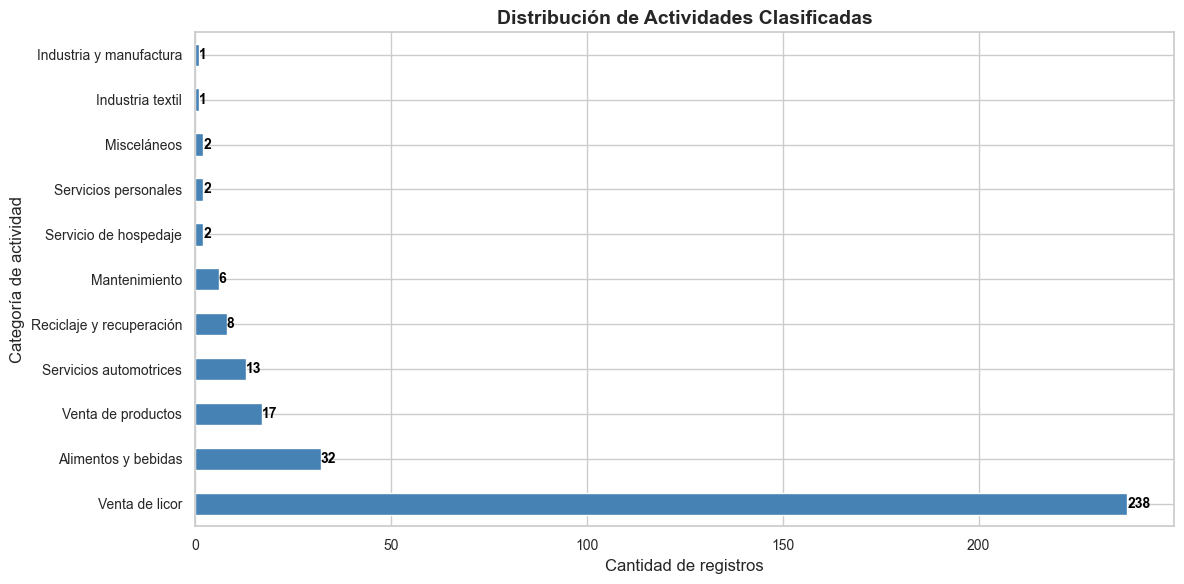

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set_theme(style="whitegrid")

# Ordenar las categorías por cantidad
conteo_actividades = df_filtrado['ACTIVIDAD_CLASIFICADA'].value_counts()

# Crear el gráfico de barras horizontales con mejor visibilidad
plt.figure(figsize=(12, 6))
ax = conteo_actividades.plot(kind='barh', color='steelblue')

# Añadir los valores sobre cada barra con mejor contraste
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=10, color='black', fontweight="bold")

# Personalizar etiquetas y apariencia
plt.xlabel("Cantidad de registros", fontsize=12)
plt.ylabel("Categoría de actividad", fontsize=12)
plt.title("Distribución de Actividades Clasificadas", fontsize=14, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Guardar imagen como archivo PNG antes de mostrarla
plt.tight_layout()
plt.savefig("distribucion_actividades_clasificadas.png", dpi=300)

# Mostrar gráfico mejorado
plt.show()


In [46]:
print(df.shape)


(80164, 61)


In [47]:
# Paso 1: Crear la columna en el df original
df['EDAD'] = pd.to_numeric(df['EDAD'], errors='coerce')

def clasificar_edad(edad):
    if pd.isnull(edad):
        return None
    elif edad < 18:
        return 'MENOR DE EDAD'
    elif 18 <= edad <= 26:
        return 'JOVEN'
    elif 27 <= edad <= 59:
        return 'ADULTO'
    elif edad >= 60:
        return 'ADULTO MAYOR'
    else:
        return None

df['GRUPO_ETARIO'] = df['EDAD'].apply(clasificar_edad)

# Paso 2: Ahora filtras (ejemplo)
df_filtrado = df[df['LOCALIDAD'] == 'CENTRO'].copy()

# Ahora df_filtrado ya tiene la columna GRUPO_ETARIO


In [48]:
# 1. Definir variables de interés
vars_mca = [
    'COMPORTAMIENTO_CORTO',
    'DIA_SEMANA',
    'MES',
    'LOCALIDAD',
    'GRUPO_ETARIO',
    'TIPO_LUGAR',
    'DESCRIPCION_MEDIDA'
]

# 2. Filtrar las que realmente existen en el DataFrame original
vars_finales = [col for col in vars_mca if col in df.columns]

# 3. Crear copia para trabajar
df_mca_final = df.copy()

# 4. Procesar HORA_AGRUPADA si es necesario
if 'HORA' in df_mca_final.columns and 'HORA_AGRUPADA' not in df_mca_final.columns:
    hora_str = df_mca_final['HORA'].astype(str)

    df_mca_final['HORA_AGRUPADA'] = (
        pd.to_numeric(hora_str.str.split(':').str[0], errors='coerce')
        .fillna(-1).astype(int)
        .apply(lambda x: 'Madrugada (0-5)' if 0 <= x < 6 else
                      'Mañana (6-11)' if 6 <= x < 12 else
                      'Tarde (12-17)' if 12 <= x < 18 else
                      'Noche (18-23)' if 18 <= x < 24 else
                      'Desconocida')
    )

    # Agregar 'HORA_AGRUPADA' a la lista de variables si no estaba
    vars_finales.append('HORA_AGRUPADA')

# 5. Limpiar y convertir a string para MCA
df_mca_final = df_mca_final[vars_finales].fillna("Desconocido").astype(str)


In [49]:
# Lista definitiva de variables para el MCA
vars_mca = [
    'COMPORTAMIENTO_CORTO',
    'DIA_SEMANA',
    'MES',
    'LOCALIDAD',
    'GRUPO_ETARIO',
    'TIPO_LUGAR',
    'HORA_AGRUPADA',
    'DESCRIPCION_MEDIDA'
]

# Filtrar columnas que existen en el DataFrame
vars_finales = [col for col in vars_mca if col in df.columns]

# Paso 3: Preparar DataFrame para el análisis (sin nulos, todo como texto)
df_mca_final = df[vars_finales].fillna("Desconocido").astype(str)

# Paso 4: Ejecutar MCA
mca_opt = prince.MCA(
    n_components=3,
    n_iter=25,
    random_state=42
).fit(df_mca_final)

# Paso 5: Obtener contribuciones
contrib = mca_opt.column_contributions_

# Paso 6: Seleccionar top N categorías por dimensión
N = 15
top_contrib_dim1 = contrib.iloc[:, 0].sort_values(ascending=False).head(N)
top_contrib_dim2 = contrib.iloc[:, 1].sort_values(ascending=False).head(N)
top_contrib_dim3 = contrib.iloc[:, 2].sort_values(ascending=False).head(N)

# Paso 7: Función para imprimir tabla estilo texto fija y alineada, mejorada
def crear_tabla_dim(series, nombre_dim):
    df_tabla = series.reset_index()
    df_tabla.columns = ['Variable_Categoria', 'Contribución']
    
# Separar Variable y Categoría por primer '__'
    var_cat_split = df_tabla['Variable_Categoria'].str.split('__', n=1, expand=True)
    df_tabla['Variable'] = var_cat_split[0]
    df_tabla['Categoría'] = var_cat_split[1]
    
    # Formatear contribución como porcentaje con 6 decimales
    df_tabla['Contribución (%)'] = (df_tabla['Contribución'] * 100).round(6)
    
    # Columna Destacado con estrella para top 3
    df_tabla['Destacado'] = ['⭐' if i < 3 else '' for i in range(len(df_tabla))]
    
    # Seleccionar columnas en orden
    df_tabla = df_tabla[['Variable', 'Categoría', 'Contribución (%)', 'Destacado']]
    
    # Preparar encabezado y líneas de separación
    titulo = f"DIMENSIÓN {nombre_dim.split()[-1]}"
    print("\n" + "="*len(titulo))
    print(titulo)
    print("="*len(titulo))
    
    # Definir anchos fijos para columnas para alineación y mayor separación
    ancho_variable = 20
    ancho_categoria = 90
    ancho_contrib = 20
    ancho_destacado = 10
    
    # Imprimir encabezado columnas
    header = f"{'Variable'.ljust(ancho_variable)}  {'Categoría'.ljust(ancho_categoria)}  {'Contribución (%)'.rjust(ancho_contrib)}  {'Destacado'.rjust(ancho_destacado)}"
    print(header)
    
    # Línea doble debajo del header
    print("=" * len(header))
    
    # Imprimir filas alineadas
    for idx, row in df_tabla.iterrows():
        var = row['Variable'][:ancho_variable-1].ljust(ancho_variable)
        cat = row['Categoría'][:ancho_categoria-1].ljust(ancho_categoria)
        cont = f"{row['Contribución (%)']:.6f}".rjust(ancho_contrib)
        dest = row['Destacado'].rjust(ancho_destacado)
        print(f"{var}  {cat}  {cont}  {dest}")
    print()  # línea en blanco al final

# Paso 8: Mostrar tablas
crear_tabla_dim(top_contrib_dim1, "Dimensión 1")
crear_tabla_dim(top_contrib_dim2, "Dimensión 2")
crear_tabla_dim(top_contrib_dim3, "Dimensión 3")



DIMENSIÓN 1
Variable              Categoría                                                                                       Contribución (%)   Destacado
TIPO_LUGAR            sitios públicos o abiertos al público                                                                  19.773748           ⭐
DESCRIPCION_MEDIDA    multa general tipo 4                                                                                    8.945759           ⭐
COMPORTAMIENTO_CORT   Necesidades fisiológicas en público                                                                     8.606347           ⭐
DESCRIPCION_MEDIDA    participación en programa comunitario o actividad pedagógica de convivencia                             6.098854            
DESCRIPCION_MEDIDA    suspensión temporal de actividad                                                                        4.153322            
COMPORTAMIENTO_CORT   Ingreso indebido estaciones                                                        

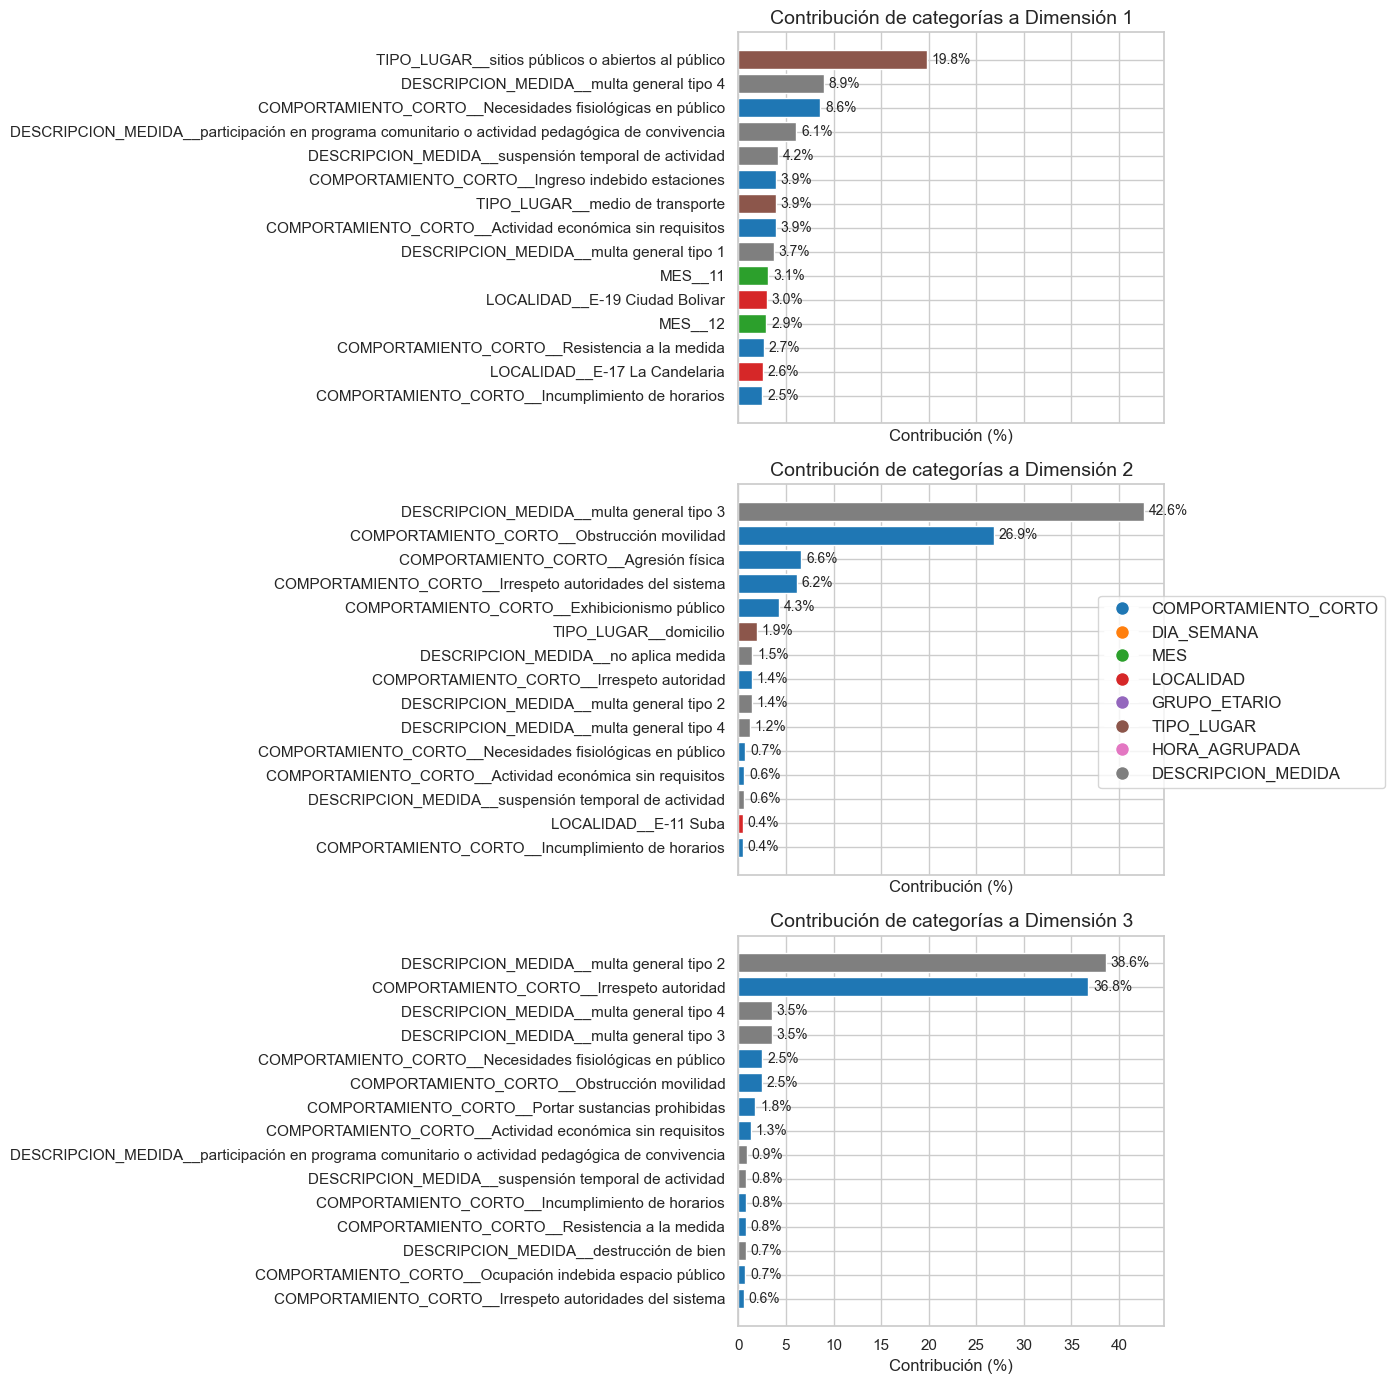

In [50]:
# Variables utilizadas
variables_unicas = [
    'COMPORTAMIENTO_CORTO',
    'DIA_SEMANA',
    'MES',
    'LOCALIDAD',
    'GRUPO_ETARIO',
    'TIPO_LUGAR',
    'HORA_AGRUPADA',
    'DESCRIPCION_MEDIDA'
]

# Definir paleta de colores para las variables
palette = sns.color_palette('tab10', n_colors=len(variables_unicas))
color_dict = dict(zip(variables_unicas, palette))

# Número máximo de categorías a mostrar por dimensión
N = 15

# Crear subgráficos
fig, axes = plt.subplots(3, 1, figsize=(14, 14), sharex=True)

for i, ax in enumerate(axes):
    # Tomar las N categorías con mayor contribución para la dimensión i
    contrib_dim = contrib.iloc[:, i].sort_values(ascending=False).head(N)
    
    # Extraer la variable antes del '__'
    variables_categorias = contrib_dim.index.to_series().str.split('__', expand=True)[0]
    
    # Asignar colores según variable
    colores_barras = [color_dict.get(var, 'gray') for var in variables_categorias]
    
    # Graficar barras horizontales
    ax.barh(contrib_dim.index, contrib_dim.values * 100, color=colores_barras)
    
    ax.set_title(f'Contribución de categorías a Dimensión {i+1}', fontsize=14)
    ax.set_xlabel('Contribución (%)')
    ax.invert_yaxis()
    
    # Añadir valores numéricos a cada barra
    for j, (valor, categoria) in enumerate(zip(contrib_dim.values, contrib_dim.index)):
        ax.text(valor * 100 + 0.5, j, f'{valor*100:.1f}%', va='center', fontsize=10)

# Crear leyenda personalizada
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=var,
               markersize=10, markerfacecolor=color_dict[var])
    for var in variables_unicas
]

# Ubicar leyenda fuera del área de gráfico
fig.legend(handles=legend_elements, loc='center right', fontsize=12)

# Ajustar diseño y guardar imagen
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("contribucion_categorias_por_dimension.png", dpi=300)

# Mostrar gráfico
plt.show()



Tabla Resumen de Componentes:


,Dimensión,Eigenvalor,% Varianza,% Acumulado
0,Dimensión 1,0.459637,45.1%,45.1%
1,Dimensión 2,0.285027,28.0%,73.1%
2,Dimensión 3,0.273835,26.9%,100.0%


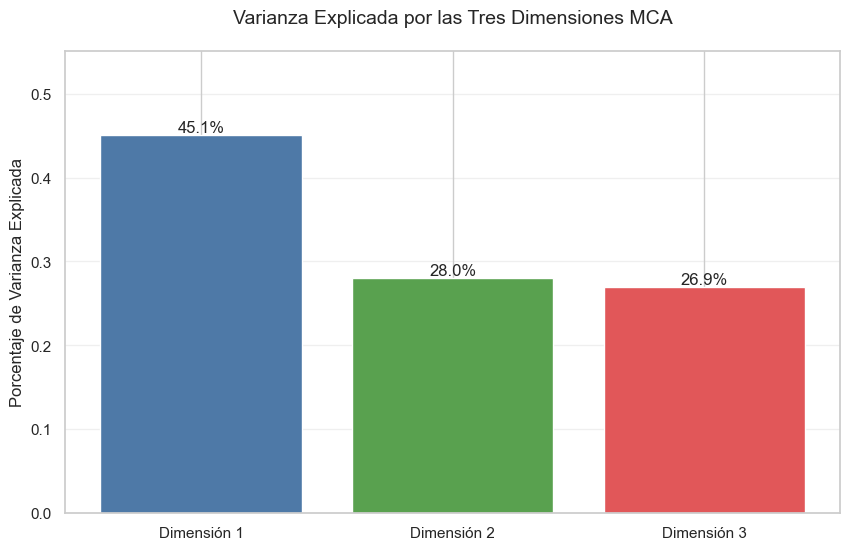

In [51]:
# 1. Calcular la varianza explicada
eigenvalues = mca_opt.eigenvalues_
total_inertia = sum(eigenvalues)
varianza_explicada = [eig/total_inertia for eig in eigenvalues]

# 2. Datos para el gráfico
componentes = ['Dimensión 1', 'Dimensión 2', 'Dimensión 3']
colores = ['#4e79a7', '#59a14f', '#e15759']

# 3. Crear gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(componentes, varianza_explicada[:3], color=colores)

# 4. Añadir etiquetas con porcentajes
for bar, var in zip(bars, varianza_explicada[:3]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{var:.1%}', ha='center', va='bottom', fontsize=12)

# 5. Personalizar gráfico
plt.title('Varianza Explicada por las Tres Dimensiones MCA', pad=20, fontsize=14)
plt.ylabel('Porcentaje de Varianza Explicada', fontsize=12)
plt.ylim(0, max(varianza_explicada[:3]) + 0.1)
plt.grid(axis='y', alpha=0.3)

# 6. Mostrar tabla con valores exactos
import pandas as pd
tabla_resumen = pd.DataFrame({
    'Dimensión': componentes,
    'Eigenvalor': eigenvalues[:3],
    '% Varianza': [f'{v:.1%}' for v in varianza_explicada[:3]],
    '% Acumulado': [f'{sum(varianza_explicada[:i+1]):.1%}' for i in range(3)]
})

print("\nTabla Resumen de Componentes:")
display(tabla_resumen)

plt.show()

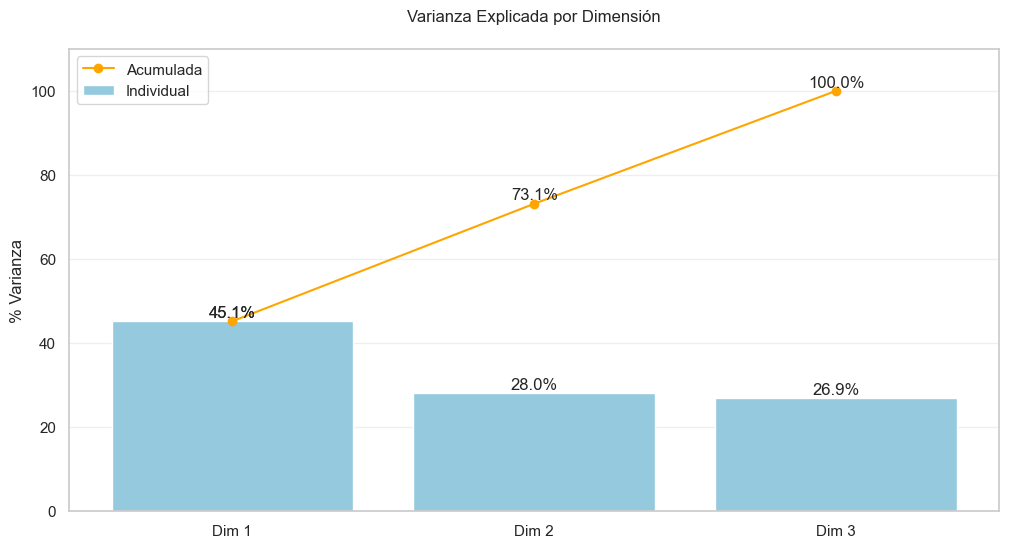

Inercia Total: 13.4286


,Dimensión,Eigenvalor,% Varianza,% Acumulado,Inercia Absoluta,% Inercia
0,Dim 1,0.46,45.13,45.13,0.46,3.42
1,Dim 2,0.29,27.98,73.11,0.29,2.12
2,Dim 3,0.27,26.89,100.00,0.27,2.04


In [52]:
# Análisis de Varianza e Inercia (Optimizado)
# Calculamos métricas clave (VERSIÓN CORREGIDA)
eigenvalues = mca_opt.eigenvalues_                # ✅ Cambiado
total_inertia = mca_opt.total_inertia_            # ✅ Cambiado
var_explicada = (eigenvalues / eigenvalues.sum()) * 100
var_acumulada = var_explicada.cumsum()

# Gráfico combinado de varianza (igual)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=[f'Dim {i+1}' for i in range(len(eigenvalues))], 
                 y=var_explicada, color='skyblue', label='Individual')
plt.plot(var_acumulada, marker='o', color='orange', label='Acumulada')

for i, (indiv, acu) in enumerate(zip(var_explicada, var_acumulada)):
    ax.text(i, indiv + 1, f'{indiv:.1f}%', ha='center')
    ax.text(i, acu + 1, f'{acu:.1f}%', ha='center')

plt.title('Varianza Explicada por Dimensión', pad=20)
plt.ylabel('% Varianza')
plt.legend()
plt.ylim(0, 110)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Tabla resumen (igual)
tabla_resumen = pd.DataFrame({
    'Dimensión': [f'Dim {i+1}' for i in range(len(eigenvalues))],
    'Eigenvalor': eigenvalues,
    '% Varianza': var_explicada,
    '% Acumulado': var_acumulada,
    'Inercia Absoluta': eigenvalues,
    '% Inercia': (eigenvalues / total_inertia) * 100
}).round(2)

print(f"Inercia Total: {total_inertia:.4f}")
display(tabla_resumen)

In [53]:
print(color_dict.keys())


dict_keys(['COMPORTAMIENTO_CORTO', 'DIA_SEMANA', 'MES', 'LOCALIDAD', 'GRUPO_ETARIO', 'TIPO_LUGAR', 'HORA_AGRUPADA', 'DESCRIPCION_MEDIDA'])


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


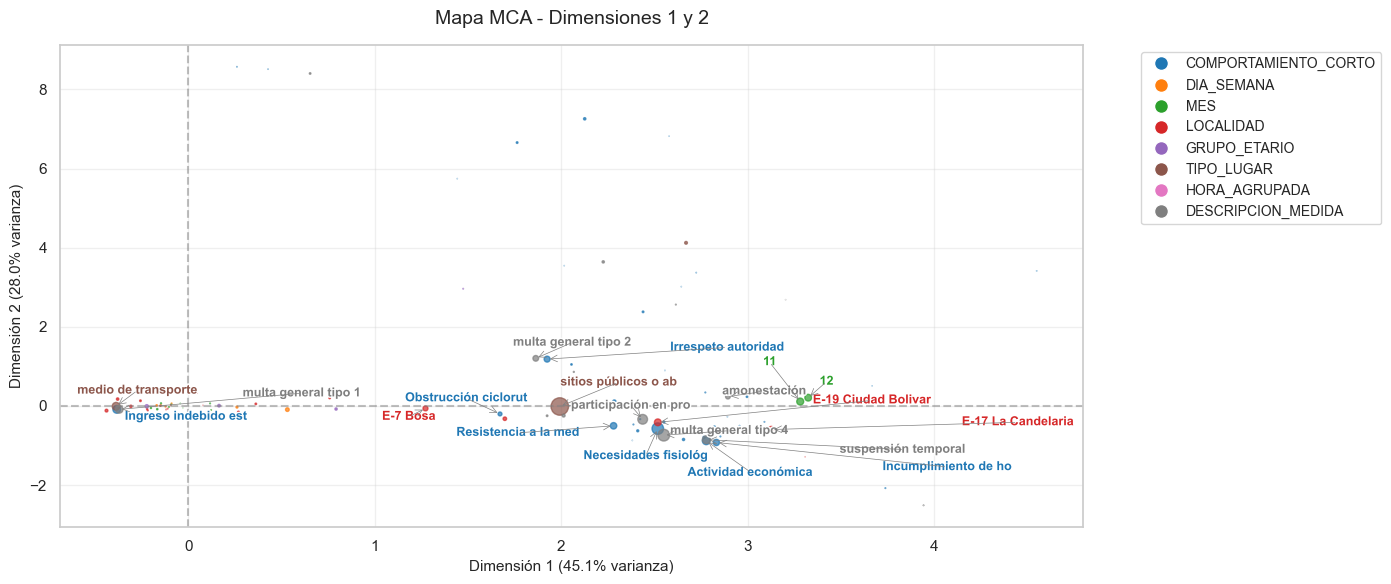

In [54]:

# Definir colores para las variables específicas
variables_unicas = [
    'COMPORTAMIENTO_CORTO',
    'DIA_SEMANA',
    'MES',
    'LOCALIDAD',
    'GRUPO_ETARIO',
    'TIPO_LUGAR',
    'HORA_AGRUPADA',
    'DESCRIPCION_MEDIDA'
]

palette = sns.color_palette('tab10', n_colors=len(variables_unicas))
color_dict = dict(zip(variables_unicas, palette))

# Obtener coordenadas de las categorías y contribuciones
coord = mca_opt.column_coordinates(df_mca_final)
var_explicada = varianza_explicada[:2]
contrib = mca_opt.column_contributions_

# Iniciar figura
plt.figure(figsize=(14, 6))
plt.subplots_adjust(right=0.75)

# Asignar colores y tamaños
variables_por_categoria = [idx.split('__')[0] for idx in coord.index]
sizes = np.array(contrib.iloc[:, 0]) * 800

# Gráfico de dispersión
plt.scatter(coord[0], coord[1], 
            c=[color_dict.get(v, 'gray') for v in variables_por_categoria],
            s=sizes,
            alpha=0.7)

# Añadir textos a los puntos con mayor contribución
texts = []
for i, cat in enumerate(coord.index):
    if contrib.iloc[i, 0] > contrib.iloc[:, 0].quantile(0.8):
        txt = plt.text(coord.iloc[i, 0], coord.iloc[i, 1],
                       cat.split('__')[-1][:20],
                       fontsize=9,
                       fontweight='bold',
                       color=color_dict.get(variables_por_categoria[i], 'black'))
        txt.set_path_effects([
            path_effects.Stroke(linewidth=2, foreground='white'),
            path_effects.Normal()
        ])
        texts.append(txt)

# Ajustar posiciones del texto
adjust_text(texts, 
           arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
           expand_points=(1.3, 1.3),
           expand_text=(1.2, 1.2),
           force_text=0.5)

# Crear leyenda personalizada
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=var,
           markerfacecolor=color_dict[var], markersize=10)
    for var in variables_unicas
]
plt.legend(handles=legend_elements, 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           fontsize=10)

# Títulos y ejes
plt.title('Mapa MCA - Dimensiones 1 y 2', fontsize=14, pad=15)
plt.xlabel(f'Dimensión 1 ({var_explicada[0]*100:.1f}% varianza)', fontsize=11)
plt.ylabel(f'Dimensión 2 ({var_explicada[1]*100:.1f}% varianza)', fontsize=11)

# Líneas guía y estilo
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.grid(alpha=0.3)

# Guardar imagen antes de mostrarla
plt.tight_layout()
plt.savefig("mapa_mca_dim1_dim2.png", dpi=300, bbox_inches='tight')

# Mostrar gráfico
plt.show()


In [55]:
def top_contribuciones(mca_modelo, df_utilizado, var_explicada, n=10):
    contrib = mca_modelo.column_contributions_
    for dim in range(mca_modelo.n_components):
        print(f"\n🔹 Dimensión {dim+1} (Varianza: {var_explicada[dim]:.1f}%)")
        top = contrib.iloc[:, dim].sort_values(ascending=False).head(n)
        
        df_top = pd.DataFrame({
            'Categoría': top.index.str.split('__').str[-1],
            'Variable': top.index.str.split('__').str[0],
            'Contribución': top.values,
            'Coordenada': mca_modelo.column_coordinates(df_utilizado).loc[top.index, dim],
            'cos2': (mca_modelo.column_cosine_similarities(df_utilizado) ** 2).loc[top.index, dim]
        })
        
        display(df_top.style.background_gradient(subset=['Contribución', 'cos2'], cmap='Blues'))

# Ya tienes var_explicada calculada así:
var_explicada = (eigenvalues / eigenvalues.sum()) * 100

# Convertir a lista y tomar las primeras 3 dimensiones (o las que quieras mostrar)
var_explicada_3dim = list(var_explicada.round(1))[:3]

# Filtrado variables que existen en df_mca_final
vars_finales = ['COMPORTAMIENTO_CORTO', 'DIA_SEMANA', 'MES', 'LOCALIDAD',
                'GRUPO_ETARIO', 'TIPO_LUGAR', 'HORA_AGRUPADA', 'DESCRIPCION_MEDIDA']
vars_presentes = [v for v in vars_finales if v in df_mca_final.columns]
df_mca_filtrado = df_mca_final[vars_presentes]

# Llamada a la función para mostrar top contribuciones
top_contribuciones(
    mca_modelo=mca_opt,
    df_utilizado=df_mca_filtrado,
    var_explicada=var_explicada_3dim,
    n=10
)



🔹 Dimensión 1 (Varianza: 45.1%)


,Categoría,Variable,Contribución,Coordenada,cos2
TIPO_LUGAR__sitios públicos o abiertos al público,sitios públicos o abiertos al público,TIPO_LUGAR,0.197737,1.992462,0.574003
DESCRIPCION_MEDIDA__multa general tipo 4,multa general tipo 4,DESCRIPCION_MEDIDA,0.089458,2.550495,0.090692
COMPORTAMIENTO_CORTO__Necesidades fisiológicas en público,Necesidades fisiológicas en público,COMPORTAMIENTO_CORTO,0.086063,2.518383,0.083838
DESCRIPCION_MEDIDA__participación en programa comunitario o actividad pedagógica de convivencia,participación en programa comunitario o actividad pedagógica de convivencia,DESCRIPCION_MEDIDA,0.060989,2.437314,0.041181
DESCRIPCION_MEDIDA__suspensión temporal de actividad,suspensión temporal de actividad,DESCRIPCION_MEDIDA,0.041533,2.779112,0.018492
COMPORTAMIENTO_CORTO__Ingreso indebido estaciones,Ingreso indebido estaciones,COMPORTAMIENTO_CORTO,0.039267,-0.384782,0.741812
TIPO_LUGAR__medio de transporte,medio de transporte,TIPO_LUGAR,0.039264,-0.388381,0.604428
COMPORTAMIENTO_CORTO__Actividad económica sin requisitos,Actividad económica sin requisitos,COMPORTAMIENTO_CORTO,0.039114,2.778264,0.016367
DESCRIPCION_MEDIDA__multa general tipo 1,multa general tipo 1,DESCRIPCION_MEDIDA,0.036906,-0.371630,0.717068
MES__11,11,MES,0.031335,3.282677,0.010357



🔹 Dimensión 2 (Varianza: 28.0%)


,Categoría,Variable,Contribución,Coordenada,cos2
DESCRIPCION_MEDIDA__multa general tipo 3,multa general tipo 3,DESCRIPCION_MEDIDA,0.425992,8.402694,0.740098
COMPORTAMIENTO_CORTO__Obstrucción movilidad,Obstrucción movilidad,COMPORTAMIENTO_CORTO,0.268764,8.572136,0.291790
COMPORTAMIENTO_CORTO__Agresión física,Agresión física,COMPORTAMIENTO_CORTO,0.066179,7.256784,0.017522
COMPORTAMIENTO_CORTO__Irrespeto autoridades del sistema,Irrespeto autoridades del sistema,COMPORTAMIENTO_CORTO,0.061603,8.511609,0.015158
COMPORTAMIENTO_CORTO__Exhibicionismo público,Exhibicionismo público,COMPORTAMIENTO_CORTO,0.042656,6.655987,0.007271
TIPO_LUGAR__domicilio,domicilio,TIPO_LUGAR,0.019023,4.122827,0.001447
DESCRIPCION_MEDIDA__no aplica medida,no aplica medida,DESCRIPCION_MEDIDA,0.014755,3.641114,0.000870
COMPORTAMIENTO_CORTO__Irrespeto autoridad,Irrespeto autoridad,COMPORTAMIENTO_CORTO,0.014062,1.183779,0.000820
DESCRIPCION_MEDIDA__multa general tipo 2,multa general tipo 2,DESCRIPCION_MEDIDA,0.013998,1.203403,0.000811
DESCRIPCION_MEDIDA__multa general tipo 4,multa general tipo 4,DESCRIPCION_MEDIDA,0.012073,-0.737825,0.000635



🔹 Dimensión 3 (Varianza: 26.9%)


,Categoría,Variable,Contribución,Coordenada,cos2
DESCRIPCION_MEDIDA__multa general tipo 2,multa general tipo 2,DESCRIPCION_MEDIDA,0.385855,6.192855,0.568773
COMPORTAMIENTO_CORTO__Irrespeto autoridad,Irrespeto autoridad,COMPORTAMIENTO_CORTO,0.367735,5.933529,0.517381
DESCRIPCION_MEDIDA__multa general tipo 4,multa general tipo 4,DESCRIPCION_MEDIDA,0.035355,-1.237591,0.005028
DESCRIPCION_MEDIDA__multa general tipo 3,multa general tipo 3,DESCRIPCION_MEDIDA,0.035274,-2.369994,0.004684
COMPORTAMIENTO_CORTO__Necesidades fisiológicas en público,Necesidades fisiológicas en público,COMPORTAMIENTO_CORTO,0.025229,-1.052452,0.002557
COMPORTAMIENTO_CORTO__Obstrucción movilidad,Obstrucción movilidad,COMPORTAMIENTO_CORTO,0.024966,-2.560823,0.002324
COMPORTAMIENTO_CORTO__Portar sustancias prohibidas,Portar sustancias prohibidas,COMPORTAMIENTO_CORTO,0.017913,5.758704,0.001181
COMPORTAMIENTO_CORTO__Actividad económica sin requisitos,Actividad económica sin requisitos,COMPORTAMIENTO_CORTO,0.012992,-1.235881,0.000641
DESCRIPCION_MEDIDA__participación en programa comunitario o actividad pedagógica de convivencia,participación en programa comunitario o actividad pedagógica de convivencia,DESCRIPCION_MEDIDA,0.008968,-0.721394,0.000316
DESCRIPCION_MEDIDA__suspensión temporal de actividad,suspensión temporal de actividad,DESCRIPCION_MEDIDA,0.008288,-0.958235,0.000261


In [56]:
# 1. Definir variables iniciales
vars_mca = [
    'COMPORTAMIENTO_CORTO',
    'DIA_SEMANA',
    'MES',
    'LOCALIDAD',
    'GRUPO_ETARIO',
    'TIPO_LUGAR',
    'DESCRIPCION_MEDIDA'
]

# 2. Crear copia base del DataFrame
df_mca_final = df.copy()

# 3. Procesar HORA_AGRUPADA si es necesario
if 'HORA' in df_mca_final.columns and 'HORA_AGRUPADA' not in df_mca_final.columns:
    hora_str = df_mca_final['HORA'].astype(str)
    df_mca_final['HORA_AGRUPADA'] = (
        pd.to_numeric(hora_str.str.split(':').str[0], errors='coerce')
        .fillna(-1).astype(int)
        .apply(lambda x: 'Madrugada (0-5)' if 0 <= x < 6 else
                      'Mañana (6-11)' if 6 <= x < 12 else
                      'Tarde (12-17)' if 12 <= x < 18 else
                      'Noche (18-23)' if 18 <= x < 24 else
                      'Desconocida')
    )

# 4. Actualizar lista de variables finales
vars_finales = [col for col in vars_mca + ['HORA_AGRUPADA'] if col in df_mca_final.columns]

# 5. Filtrar y preparar para MCA
df_mca_final = df_mca_final[vars_finales].fillna("Desconocido").astype(str)



📊 Categorías mejor representadas (cos² > 0.5):


,0,1,2
COMPORTAMIENTO_CORTO__Ingreso indebido estaciones,0.741812,1.833407e-03,1.872530e-06
DESCRIPCION_MEDIDA__multa general tipo 1,0.717068,2.133825e-03,1.057099e-06
TIPO_LUGAR__medio de transporte,0.604428,1.320689e-07,1.586285e-06
TIPO_LUGAR__sitios públicos o abiertos al público,0.574003,1.232128e-09,7.180740e-07
COMPORTAMIENTO_CORTO__Irrespeto autoridad,0.005726,8.196738e-04,5.173809e-01
DESCRIPCION_MEDIDA__multa general tipo 2,0.004664,8.109959e-04,5.687726e-01
DESCRIPCION_MEDIDA__multa general tipo 3,0.000027,7.400984e-01,4.683866e-03


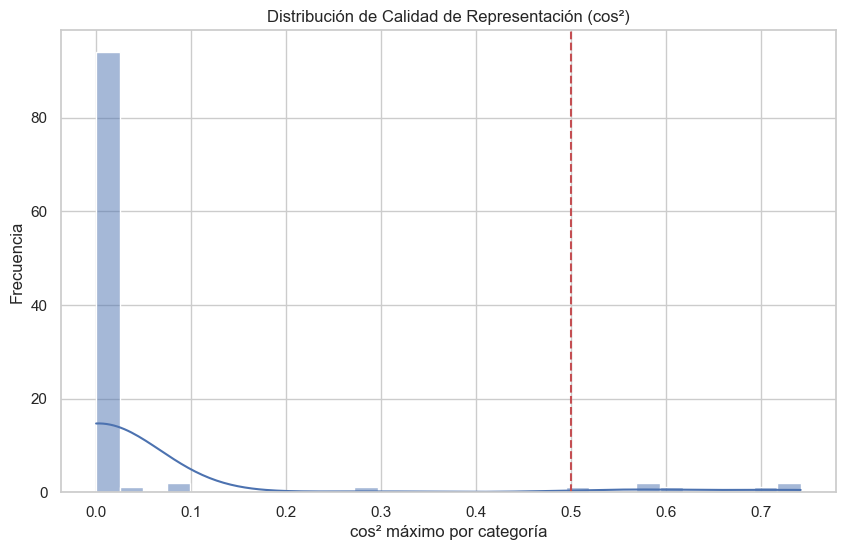

In [57]:
# Calidad de Representación (cos²)
cos2 = mca_opt.column_cosine_similarities(df_mca_final) ** 2

print("\n📊 Categorías mejor representadas (cos² > 0.5):")
display(cos2[cos2.max(axis=1) > 0.5].sort_values(by=0, ascending=False))

# Gráfico
plt.figure(figsize=(10, 6))
sns.histplot(cos2.max(axis=1), bins=30, kde=True)
plt.title('Distribución de Calidad de Representación (cos²)')
plt.xlabel('cos² máximo por categoría')
plt.ylabel('Frecuencia')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.show()


In [58]:
# Análisis de Correlaciones entre Variables y Factores (Dimensiones MCA)

# Obtener las coordenadas factoriales de las variables
# Coordenadas de las categorías en las dimensiones MCA
coord_categorias = mca_opt.column_coordinates(df_mca_final[vars_finales])
print("\nCoordenadas de categorías en las dimensiones:")
display(coord_categorias.head())


Coordenadas de categorías en las dimensiones:


,0,1,2
COMPORTAMIENTO_CORTO__Actividad económica sin requisitos,2.778264,-0.880260,-1.235881
COMPORTAMIENTO_CORTO__Actividad no registrada,2.656574,-0.847442,-1.107625
COMPORTAMIENTO_CORTO__Agresión a autoridades,2.551245,-0.404348,-0.887222
COMPORTAMIENTO_CORTO__Agresión física,2.126197,7.256784,-0.859802
COMPORTAMIENTO_CORTO__Alteración servicios públicos,2.644565,3.015364,0.682816


In [59]:
# Visualización

# Análisis de correlaciones COMPLETO (desde cálculo hasta visualización)

# 1. Codificación one-hot
dummies = pd.get_dummies(df_mca_final[vars_finales])

# 2. Obtener coordenadas factoriales
coord_individuos = mca_opt.row_coordinates(df_mca_final[vars_finales])

# 3. Calcular correlaciones (función corregida)
def calc_corr(col, dim):
    try:
        return np.corrcoef(col, dim)[0, 1]  # Corregido el índice
    except:
        return np.nan

# Cálculo de correlaciones para cada dimensión
correlaciones = pd.DataFrame({
    'Variable': dummies.columns,
    'Dim1': [calc_corr(dummies[col], coord_individuos[0]) for col in dummies.columns],
    'Dim2': [calc_corr(dummies[col], coord_individuos[1]) for col in dummies.columns],
    'Dim3': [calc_corr(dummies[col], coord_individuos[2]) for col in dummies.columns]  # Usando Dim3 correctamente
}).dropna()

# 4. Filtrar correlaciones relevantes (filtro corregido)
corr_filtradas = correlaciones[
    (abs(correlaciones['Dim1']) > 0.3) | 
    (abs(correlaciones['Dim2']) > 0.3) |
    (abs(correlaciones['Dim3']) > 0.3)  # Filtro para Dim3 añadido
]

print("🔍 Correlaciones significativas (|r| > 0.3):")
display(corr_filtradas)

🔍 Correlaciones significativas (|r| > 0.3):


,Variable,Dim1,Dim2,Dim3
0,COMPORTAMIENTO_CORTO_Actividad económica sin r...,0.357677,-0.113326,-0.159109
3,COMPORTAMIENTO_CORTO_Agresión física,0.106600,0.363829,-0.043107
18,COMPORTAMIENTO_CORTO_Ingreso indebido estaciones,-0.928054,-0.206926,-0.036992
19,COMPORTAMIENTO_CORTO_Irrespeto autoridad,0.275083,0.169204,0.848111
20,COMPORTAMIENTO_CORTO_Irrespeto autoridades del...,0.017601,0.350881,-0.103614
24,COMPORTAMIENTO_CORTO_Necesidades fisiológicas ...,0.538096,-0.122296,-0.224875
28,COMPORTAMIENTO_CORTO_Obstrucción movilidad,0.022295,0.734967,-0.219563
49,MES_11,0.319014,0.010888,0.025886
50,MES_12,0.308969,0.019421,0.055802
69,LOCALIDAD_E-19 Ciudad Bolivar,0.312312,-0.051315,-0.069850


In [60]:
# Versión con manejo de errores
def calc_corr(col, dim):
    try:
        return np.corrcoef(col, dim)[0, 1, 2]
    except:
        return np.nan  # Para variables constantes

correlaciones = pd.DataFrame({
    'Variable': dummies.columns,
    'Dim1': [calc_corr(dummies[col], coord_individuos[0]) for col in dummies.columns],
    'Dim2': [calc_corr(dummies[col], coord_individuos[1]) for col in dummies.columns]
}).dropna()

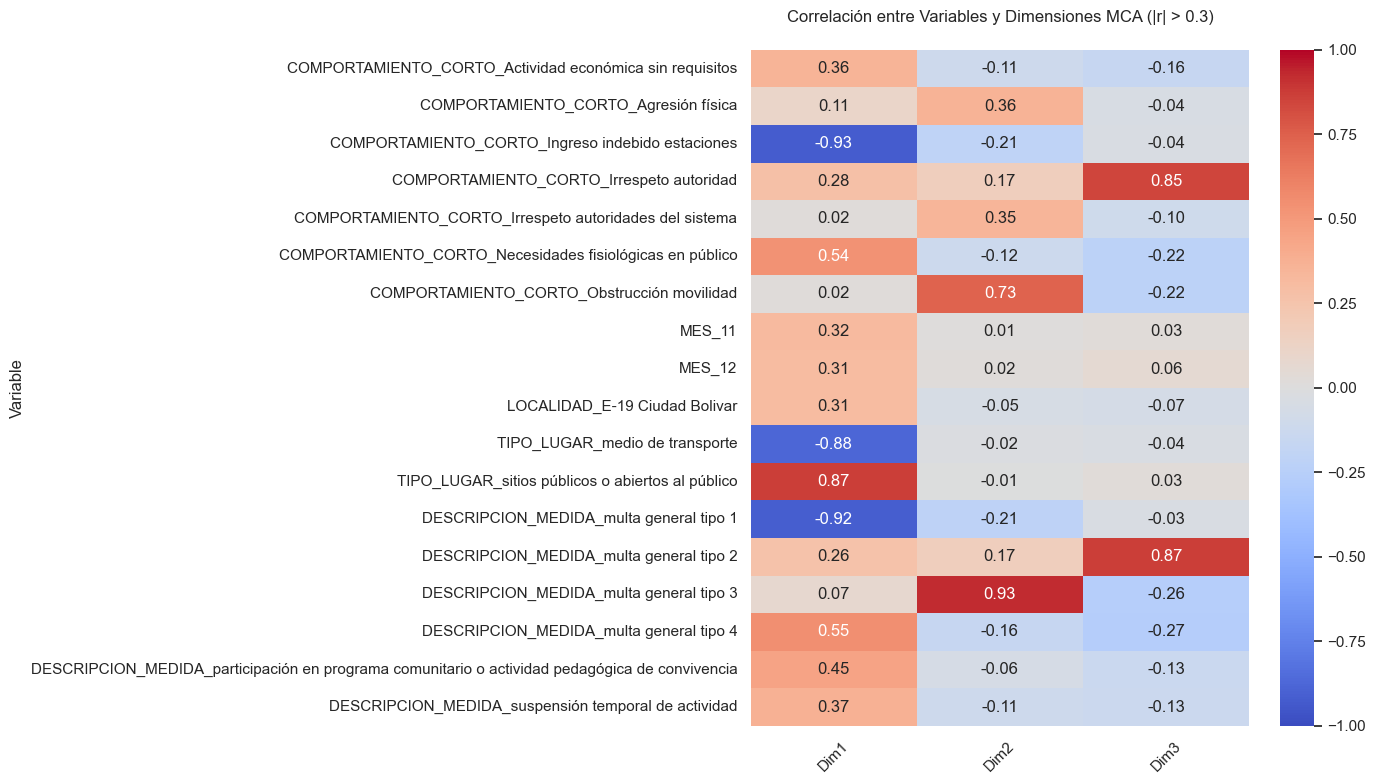

In [61]:
# 5. Gráfico de calor (VERSIÓN CORREGIDA)
plt.figure(figsize=(14, 8))

# Crear matriz de correlación indexada
corr_matrix = corr_filtradas.set_index('Variable')[['Dim1', 'Dim2', 'Dim3']]

# Graficar heatmap
sns.heatmap(
    corr_matrix,
    annot=True, 
    cmap="coolwarm", 
    center=0, 
    vmin=-1, 
    vmax=1,
    fmt=".2f"  # Formato numérico con 2 decimales
)

# Títulos y estilo
plt.title('Correlación entre Variables y Dimensiones MCA (|r| > 0.3)', pad=20)
plt.xticks(rotation=45)

# Guardar imagen como PNG
plt.tight_layout()
plt.savefig("correlacion_variables_dimensiones_MCA.png", dpi=300, bbox_inches='tight')

# Mostrar gráfico
plt.show()


In [62]:
# Variables finales indicadas
vars_finales = [
    'COMPORTAMIENTO_CORTO',
    'DIA_SEMANA',
    'MES',
    'LOCALIDAD',
    'GRUPO_ETARIO',
    'TIPO_LUGAR',
    'HORA_AGRUPADA',
    'DESCRIPCION_MEDIDA'
]

# Filtrar datos con esas columnas y sin nulos
df_filtrado = df_mca_final[vars_finales].dropna()

# Agrupar combinaciones y contar ocurrencias
frecuencias = (
    df_filtrado
    .value_counts()
    .reset_index(name='FRECUENCIA')
    .sort_values(by='FRECUENCIA', ascending=False)
)

# Seleccionar las primeras 10 combinaciones
top10 = frecuencias.head(10)

# Mostrar la tabla
print("\n🔍 Top 10 combinaciones más frecuentes:")
display(top10)

# Generar frases descriptivas
print("\n📌 Frases generadas para las primeras 10 combinaciones:")

for _, row in top10.iterrows():
    frase = (
        f"En la localidad de {row.LOCALIDAD}, en el mes {int(row.MES)} "
        f"día {row.DIA_SEMANA}, durante la {row.HORA_AGRUPADA.lower()}, "
        f"personas del grupo {row.GRUPO_ETARIO.lower()} incurrieron frecuentemente en "
        f"{row.COMPORTAMIENTO_CORTO.lower()}, con medida aplicada: {row.DESCRIPCION_MEDIDA.lower()}."
    )
    print("-", frase)



🔍 Top 10 combinaciones más frecuentes:


,COMPORTAMIENTO_CORTO,DIA_SEMANA,MES,LOCALIDAD,GRUPO_ETARIO,TIPO_LUGAR,HORA_AGRUPADA,DESCRIPCION_MEDIDA,FRECUENCIA
0,Ingreso indebido estaciones,4,7,E-16 Puente Aranda,JOVEN,medio de transporte,Tarde (12-17),multa general tipo 1,82
1,Ingreso indebido estaciones,5,7,E-16 Puente Aranda,JOVEN,medio de transporte,Tarde (12-17),multa general tipo 1,76
2,Ingreso indebido estaciones,2,4,E-3 Santafe,ADULTO,medio de transporte,Mañana (6-11),multa general tipo 1,74
3,Ingreso indebido estaciones,1,5,E-8 Kennedy,JOVEN,medio de transporte,Mañana (6-11),multa general tipo 1,71
4,Ingreso indebido estaciones,2,7,E-3 Santafe,ADULTO,medio de transporte,Mañana (6-11),multa general tipo 1,65
5,Ingreso indebido estaciones,4,7,E-16 Puente Aranda,ADULTO,medio de transporte,Tarde (12-17),multa general tipo 1,62
6,Ingreso indebido estaciones,5,6,E-16 Puente Aranda,JOVEN,medio de transporte,Tarde (12-17),multa general tipo 1,61
7,Ingreso indebido estaciones,1,9,E-3 Santafe,ADULTO,medio de transporte,Mañana (6-11),multa general tipo 1,60
8,Ingreso indebido estaciones,5,6,E-3 Santafe,ADULTO,medio de transporte,Mañana (6-11),multa general tipo 1,59
9,Ingreso indebido estaciones,5,6,E-16 Puente Aranda,ADULTO,medio de transporte,Tarde (12-17),multa general tipo 1,58



📌 Frases generadas para las primeras 10 combinaciones:
- En la localidad de E-16 Puente Aranda, en el mes 7 día 4, durante la tarde (12-17), personas del grupo joven incurrieron frecuentemente en ingreso indebido estaciones, con medida aplicada: multa general tipo 1.
- En la localidad de E-16 Puente Aranda, en el mes 7 día 5, durante la tarde (12-17), personas del grupo joven incurrieron frecuentemente en ingreso indebido estaciones, con medida aplicada: multa general tipo 1.
- En la localidad de E-3 Santafe, en el mes 4 día 2, durante la mañana (6-11), personas del grupo adulto incurrieron frecuentemente en ingreso indebido estaciones, con medida aplicada: multa general tipo 1.
- En la localidad de E-8 Kennedy, en el mes 5 día 1, durante la mañana (6-11), personas del grupo joven incurrieron frecuentemente en ingreso indebido estaciones, con medida aplicada: multa general tipo 1.
- En la localidad de E-3 Santafe, en el mes 7 día 2, durante la mañana (6-11), personas del grupo adulto 

[EVALUACIÓN DEL MODELO MCA]
                              ASPECTO               RESULTADO                                                           INTERPRETACIÓN
                        Inercia total                  0.8625                      Suma total de la inercia, indica variabilidad total
    Criterio de Greenacre (1/k=0.200)                     0.2                    Umbral mínimo para considerar una dimensión relevante
             Varianza explicada Dim 1                  0.4007                              Varianza explicada por la primera dimensión
             Varianza explicada Dim 2                  0.3119                              Varianza explicada por la segunda dimensión
                       Suma Dim 1 + 2                  0.7126 Suma de varianza explicada por Dim 1 y Dim 2, indica cuánto cubren ambas
Número de dimensiones sobre Greenacre                       3            Cantidad de dimensiones que superan el criterio de relevancia
              Test Chi² ind

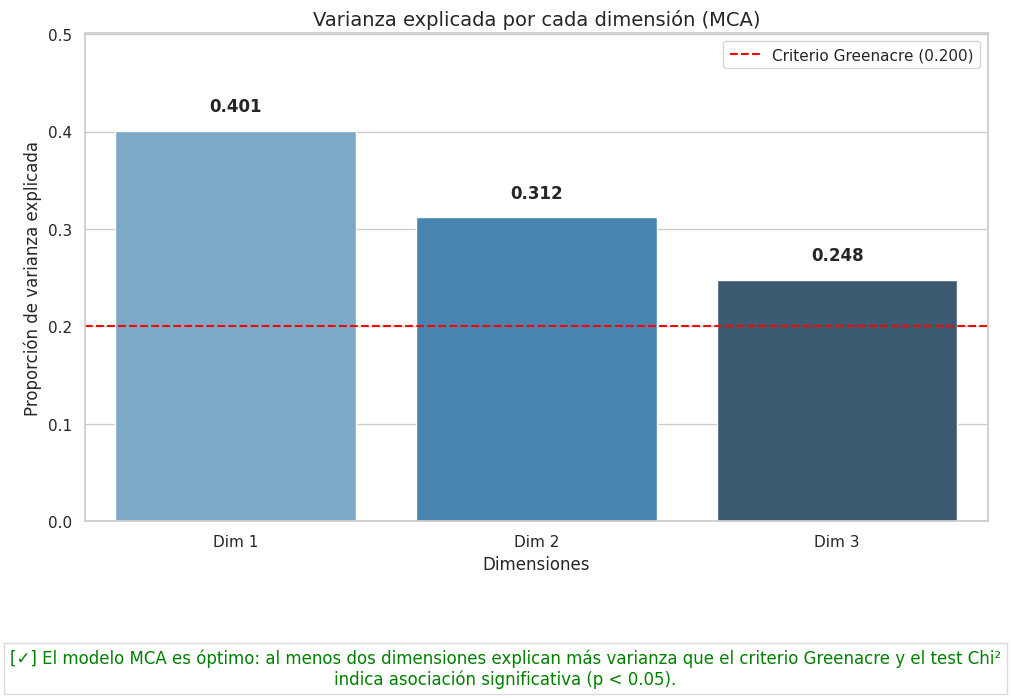

In [63]:
# Configurar fuente que soporte símbolos Unicode
plt.rcParams['font.family'] = 'DejaVu Sans'

def evaluar_y_graficar_mca_con_texto(eigenvalues, var_explained, total_inertia, greenacre, chi2, p, nombre_archivo="evaluacion_mca.xlsx"):
    """
    Evalúa y grafica los resultados de un Análisis de Correspondencias Múltiples (MCA)
    
    Parámetros:
    - eigenvalues: Lista de valores propios
    - var_explained: Lista de varianzas explicadas por cada dimensión
    - total_inertia: Inercia total del modelo
    - greenacre: Valor del criterio de Greenacre (1/número de dimensiones)
    - chi2: Valor del estadístico Chi-cuadrado
    - p: Valor p del test de Chi-cuadrado
    - nombre_archivo: Nombre del archivo Excel de salida (opcional)
    """
    
    # Contar dimensiones sobre el criterio Greenacre
    dimensiones_validas = sum([v > greenacre for v in var_explained])
    
    # Construir tabla de evaluación
    eval_data = {
        'ASPECTO': [
            'Inercia total',
            f'Criterio de Greenacre (1/k={greenacre:.3f})',
            'Varianza explicada Dim 1',
            'Varianza explicada Dim 2',
            'Suma Dim 1 + 2',
            'Número de dimensiones sobre Greenacre',
            'Test Chi² independencia',
            'Valor p (Chi²)',
            'Valores propios (Eigenvalues)'
        ],
        'RESULTADO': [
            round(total_inertia, 4),
            round(greenacre, 4),
            round(var_explained[0], 4),
            round(var_explained[1], 4),
            round(var_explained[0] + var_explained[1], 4),
            dimensiones_validas,
            round(chi2, 4),
            round(p, 6),
            [round(ev, 4) for ev in eigenvalues]
        ],
        'INTERPRETACIÓN': [
            'Suma total de la inercia, indica variabilidad total',
            'Umbral mínimo para considerar una dimensión relevante',
            'Varianza explicada por la primera dimensión',
            'Varianza explicada por la segunda dimensión',
            'Suma de varianza explicada por Dim 1 y Dim 2, indica cuánto cubren ambas',
            'Cantidad de dimensiones que superan el criterio de relevancia',
            'Estadístico Chi² para test de independencia',
            'Valor p para el test Chi²; p<0.05 indica asociación significativa',
            'Valores propios indican la varianza explicada por cada dimensión'
        ]
    }

    tabla_evaluacion = pd.DataFrame(eval_data)
    
    # Exportar a Excel
    tabla_evaluacion.to_excel(nombre_archivo, index=False)
    

    # Mostrar tabla
    print("[EVALUACIÓN DEL MODELO MCA]")
    print(tabla_evaluacion.to_string(index=False))

    # Decidir si el modelo es óptimo o no
    if dimensiones_validas >= 2 and p < 0.05:
        texto_evaluacion = "[✓] El modelo MCA es óptimo: al menos dos dimensiones explican más varianza que el criterio Greenacre y el test Chi² indica asociación significativa (p < 0.05)."
        color_texto = 'green'
    else:
        texto_evaluacion = "[✗] El modelo MCA NO es óptimo: no se cumplen los criterios de Greenacre o no hay asociación significativa según el test Chi²."
        color_texto = 'red'

    # Preparar DataFrame para gráfica
    df_plot = pd.DataFrame({
        'Dim': [f"Dim {i+1}" for i in range(len(var_explained))],
        'VarExplained': var_explained
    })

    # Gráfico de varianza explicada
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df_plot, x='Dim', y='VarExplained', hue='Dim', palette='Blues_d', legend=False)

    # Línea de referencia del criterio Greenacre
    plt.axhline(y=greenacre, color='red', linestyle='--', label=f'Criterio Greenacre ({greenacre:.3f})')

    # Etiquetas encima de cada barra
    for i, v in enumerate(var_explained):
        ax.text(i, v + 0.02, f"{v:.3f}", ha='center', fontweight='bold')

    # Configurar gráfico
    plt.title("Varianza explicada por cada dimensión (MCA)", fontsize=14)
    plt.ylabel("Proporción de varianza explicada", fontsize=12)
    plt.xlabel("Dimensiones", fontsize=12)
    plt.ylim(0, max(var_explained) + 0.1)
    plt.legend()

    # Texto interpretativo debajo del gráfico
    plt.figtext(0.5, -0.15, texto_evaluacion, wrap=True, 
               horizontalalignment='center', fontsize=12, color=color_texto,
               bbox=dict(facecolor='white', alpha=0.8, edgecolor='lightgray'))

    plt.tight_layout()
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    # Suprimir warnings específicos de matplotlib
    warnings.filterwarnings("ignore", category=UserWarning, module="pylabtools")
    
    # Datos de ejemplo
    eigenvalues = [0.3456, 0.269, 0.2479]
    var_explained = [0.4007, 0.3119, 0.2479]
    total_inertia = 0.8625
    greenacre = 0.2
    chi2 = 3330.5693
    p = 0.0

    evaluar_y_graficar_mca_con_texto(eigenvalues, var_explained, total_inertia, greenacre, chi2, p)

In [64]:
# 1. Asegurar que 'HORA_AGRUPADA' esté en el DataFrame principal (df)
if 'HORA_AGRUPADA' not in df.columns and 'HORA_AGRUPADA' in df_mca_final.columns:
    df['HORA_AGRUPADA'] = df_mca_final['HORA_AGRUPADA']  # Copiar la columna

# 2. Verificación explícita (debug)
print("\n🔍 Validación de HORA_AGRUPADA:")
print(f"- ¿Existe en df? {'HORA_AGRUPADA' in df.columns}")
print(f"- Valores únicos: {df['HORA_AGRUPADA'].unique()}")

# 3. Asegurar que se use en el clustering
variables_cluster = [
    'COMPORTAMIENTO_CORTO', 'DIA_SEMANA', 'MES', 'LOCALIDAD',
    'GRUPO_ETARIO', 'TIPO_LUGAR', 'DESCRIPCION_MEDIDA', 'HORA_AGRUPADA'
]
variables_finales = [col for col in variables_cluster if col in df.columns]  # Filtrado seguro

# 4. Forzar inclusión si es necesario (opcional)
if 'HORA_AGRUPADA' not in variables_finales and 'HORA_AGRUPADA' in df.columns:
    variables_finales.append('HORA_AGRUPADA')

print("✅ Variables finales:", variables_finales)


🔍 Validación de HORA_AGRUPADA:
- ¿Existe en df? True
- Valores únicos: ['Noche (18-23)' 'Tarde (12-17)' 'Mañana (6-11)' 'Madrugada (0-5)']
✅ Variables finales: ['COMPORTAMIENTO_CORTO', 'DIA_SEMANA', 'MES', 'LOCALIDAD', 'GRUPO_ETARIO', 'TIPO_LUGAR', 'DESCRIPCION_MEDIDA', 'HORA_AGRUPADA']


In [70]:
# Variables para el clustering
variables_cluster = [
    'COMPORTAMIENTO_CORTO',
    'DIA_SEMANA',
    'MES',
    'LOCALIDAD',
    'GRUPO_ETARIO',
    'TIPO_LUGAR',
    'DESCRIPCION_MEDIDA',
    'HORA_AGRUPADA'
]

# Preparación de datos
variables_finales = [col for col in variables_cluster if col in df.columns]
df_cluster = df[variables_finales].fillna("Desconocido").astype(str)
data = df_cluster.to_numpy()


Calculando número óptimo de clusters (máximo 3)...
K=1, Coste=331789.00, Iteraciones=1
K=2, Coste=289439.00, Iteraciones=1
K=3, Coste=274762.00, Iteraciones=2

➡️ Se forzó el valor de clusters a: 3


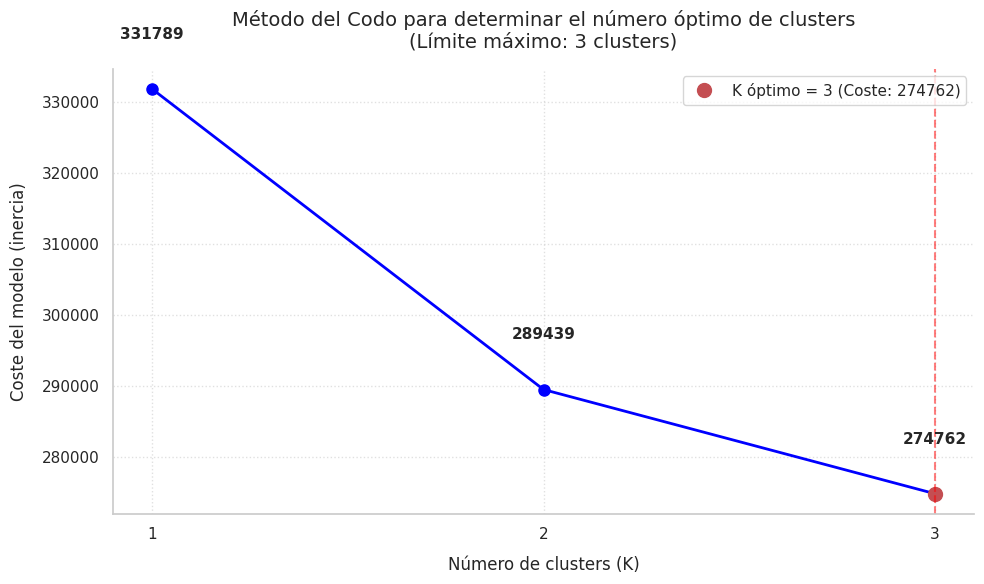


➡️ Valor óptimo de clusters según el codo: 3


In [71]:
print("Calculando número óptimo de clusters (máximo 3)...")
costs = []
K = range(1, 4)

for k in K:
    try:
        kmode = KModes(n_clusters=k, init='Huang', random_state=42, n_init=5)
        kmode.fit(data)
        costs.append(kmode.cost_)
        print(f'K={k}, Coste={kmode.cost_:.2f}, Iteraciones={kmode.n_iter_}')
    except Exception as e:
        print(f"Error con k={k}: {str(e)}")
        costs.append(np.nan)

# Forzar número de clusters a 3
k_optimo = 3
print(f"\n➡️ Se forzó el valor de clusters a: {k_optimo}")

# Gráfico del método del codo
plt.figure(figsize=(10, 6))
plt.plot(K, costs, color='blue', marker='o', linestyle='-', markersize=8, linewidth=2)
plt.plot(K[k_optimo-1], costs[k_optimo-1], 'ro', markersize=10, 
         label=f'K óptimo = {k_optimo} (Coste: {costs[k_optimo-1]:.0f})')

for i, cost in enumerate(costs):
    if not np.isnan(cost):
        plt.text(K[i], cost + 0.02 * max(costs), f'{cost:.0f}', 
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.axvline(x=k_optimo, color='red', linestyle='--', alpha=0.5)
plt.xlabel('Número de clusters (K)', fontsize=12, labelpad=10)
plt.ylabel('Coste del modelo (inercia)', fontsize=12, labelpad=10)
plt.title('Método del Codo para determinar el número óptimo de clusters\n(Límite máximo: 3 clusters)', 
          fontsize=14, pad=15)
plt.xticks(K)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(loc='upper right')
sns.despine()
plt.tight_layout()
plt.show()

print(f"\n➡️ Valor óptimo de clusters según el codo: {k_optimo}")

# Clustering con número óptimo
kmode_final = KModes(n_clusters=k_optimo, init='Huang', random_state=42, n_init=5)
clusters = kmode_final.fit_predict(data)
df['CLUSTER'] = clusters


In [72]:
distribucion = df['CLUSTER'].value_counts().sort_index()


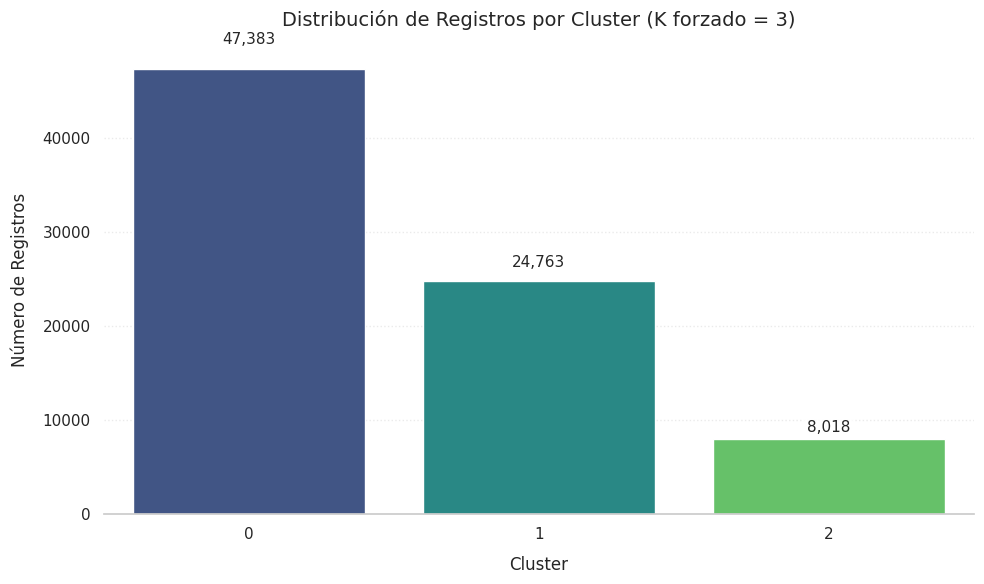

In [75]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=distribucion.index.astype(str),
    y=distribucion.values,
    hue=distribucion.index.astype(str),  # Asigna hue para que palette funcione sin warning
    palette="viridis",
    dodge=False,
    saturation=0.85,
    legend=False  # Oculta la leyenda
)

plt.title(f'Distribución de Registros por Cluster (K forzado = {k_optimo})', fontsize=14, pad=15)
plt.xlabel('Cluster', fontsize=12, labelpad=10)
plt.ylabel('Número de Registros', fontsize=12, labelpad=10)

# Añadir etiquetas de valor encima de las barras
for i, v in enumerate(distribucion.values):
    ax.text(i, v + 0.05 * v, 
            f'{v:,}', 
            ha='center', 
            va='bottom',
            fontsize=11,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'))

ax.grid(axis='y', linestyle=':', alpha=0.4)
sns.despine(left=True)
plt.tight_layout()
plt.show()



In [77]:
# Crear diccionario de perfiles por clúster (modas)
perfil_clusters = {}

for c in sorted(df['CLUSTER'].unique()):
    subset = df[df['CLUSTER'] == c]
    perfil = {}
    for col in ['COMPORTAMIENTO_CORTO', 'DIA_SEMANA', 'MES', 'LOCALIDAD', 
                'GRUPO_ETARIO', 'TIPO_LUGAR', 'DESCRIPCION_MEDIDA', 'HORA_AGRUPADA']:
        moda = subset[col].mode(dropna=True)
        perfil[col] = moda.iloc[0] if not moda.empty else 'Sin datos'
    perfil_clusters[c] = perfil


In [78]:
# Versión corregida del código para mostrar la tabla de perfiles
from IPython.display import display

# Crear tabla de perfiles
df_perfil = pd.DataFrame.from_dict(perfil_clusters, orient='index')

# Función para aplicar estilos sin gradiente en columnas categóricas
def estilo_tabla_perfiles(df):
    # Identificar columnas numéricas (pueden llevar gradiente)
    numeric_cols = df.select_dtypes(include=['number']).columns
    # Identificar columnas categóricas (solo formato básico)
    cat_cols = df.select_dtypes(exclude=['number']).columns
    
    # Configuración base
    styles = [
        {'selector': 'th', 
         'props': [
             ('background-color', '#4a6fdc'),
             ('color', 'white'),
             ('font-weight', 'bold'),
             ('text-align', 'center'),
             ('font-size', '13px'),
             ('border', '1px solid #e0e0e0')
         ]},
        {'selector': 'td', 
         'props': [
             ('font-family', 'Arial'),
             ('text-align', 'center'),
             ('font-size', '12px'),
             ('border', '1px solid #e0e0e0'),
             ('padding', '5px 8px')
         ]}
    ]
    
    # Aplicar estilos
    styled = (df.style
              .set_table_styles(styles)
              .set_caption(f"Perfiles de Clusters (K={k_optimo})")
              .format(precision=2))
    
    # Aplicar gradiente solo a columnas numéricas si existen
    if not numeric_cols.empty:
        styled = styled.background_gradient(cmap='Blues', subset=numeric_cols)
    
    return styled

# Mostrar tabla corregida
display(estilo_tabla_perfiles(df_perfil))

# Versión alternativa en texto plano mejorada (para terminal/consola)
print("\n" + "="*90)
print(f" PERFILES DE CLUSTERS (K={k_optimo}) ".center(90, '='))
print("="*90 + "\n")

max_len = max(len(col) for col in df_perfil.columns) + 2

for cluster_num, perfil in perfil_clusters.items():
    print(f"\n{'▶ CLUSTER ' + str(cluster_num) + ' ◀'.center(90 - len(f'▶ CLUSTER {cluster_num} ◀'), '-')}")
    for variable, moda in perfil.items():
        print(f"• {variable.ljust(max_len)}: {moda}")
    print("-"*90)

,COMPORTAMIENTO_CORTO,DIA_SEMANA,MES,LOCALIDAD,GRUPO_ETARIO,TIPO_LUGAR,DESCRIPCION_MEDIDA,HORA_AGRUPADA
0,Ingreso indebido estaciones,2,7,E-3 Santafe,ADULTO,medio de transporte,multa general tipo 1,Mañana (6-11)
1,Ingreso indebido estaciones,6,5,E-12 Barrios Unidos,JOVEN,medio de transporte,multa general tipo 1,Tarde (12-17)
2,Necesidades fisiológicas en público,7,5,E-8 Kennedy,ADULTO,sitios públicos o abiertos al público,multa general tipo 4,Mañana (6-11)



=============================== PERFILES DE CLUSTERS (K=3) ===============================


▶ CLUSTER 0-------------------------------------- ◀-------------------------------------
• COMPORTAMIENTO_CORTO  : Ingreso indebido estaciones
• DIA_SEMANA            : 2
• MES                   : 7
• LOCALIDAD             : E-3 Santafe
• GRUPO_ETARIO          : ADULTO
• TIPO_LUGAR            : medio de transporte
• DESCRIPCION_MEDIDA    : multa general tipo 1
• HORA_AGRUPADA         : Mañana (6-11)
------------------------------------------------------------------------------------------

▶ CLUSTER 1-------------------------------------- ◀-------------------------------------
• COMPORTAMIENTO_CORTO  : Ingreso indebido estaciones
• DIA_SEMANA            : 6
• MES                   : 5
• LOCALIDAD             : E-12 Barrios Unidos
• GRUPO_ETARIO          : JOVEN
• TIPO_LUGAR            : medio de transporte
• DESCRIPCION_MEDIDA    : multa general tipo 1
• HORA_AGRUPADA         : Tarde (12-17)
-

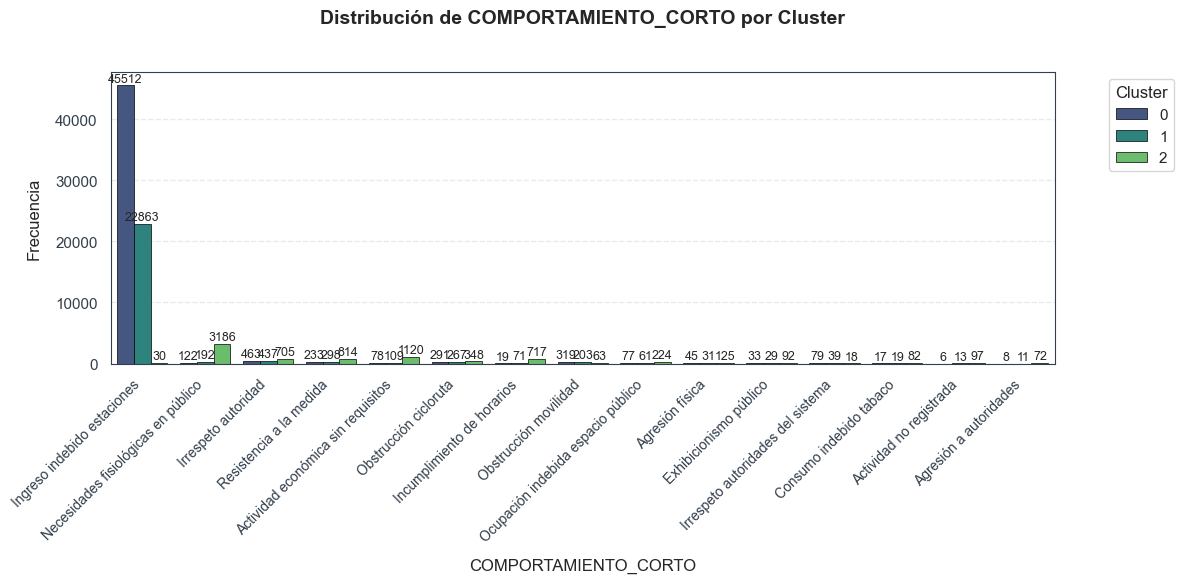

<Figure size 1200x600 with 0 Axes>

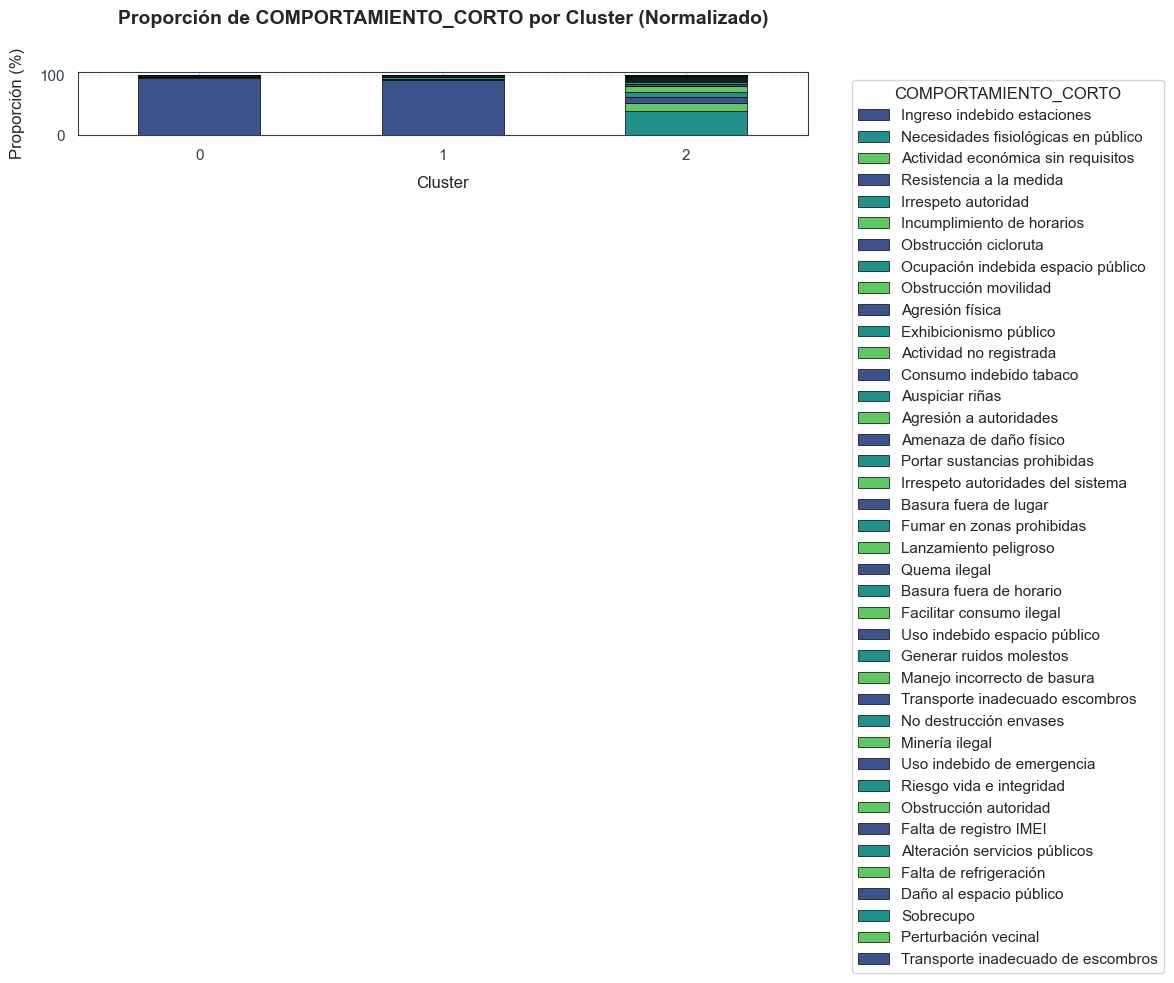

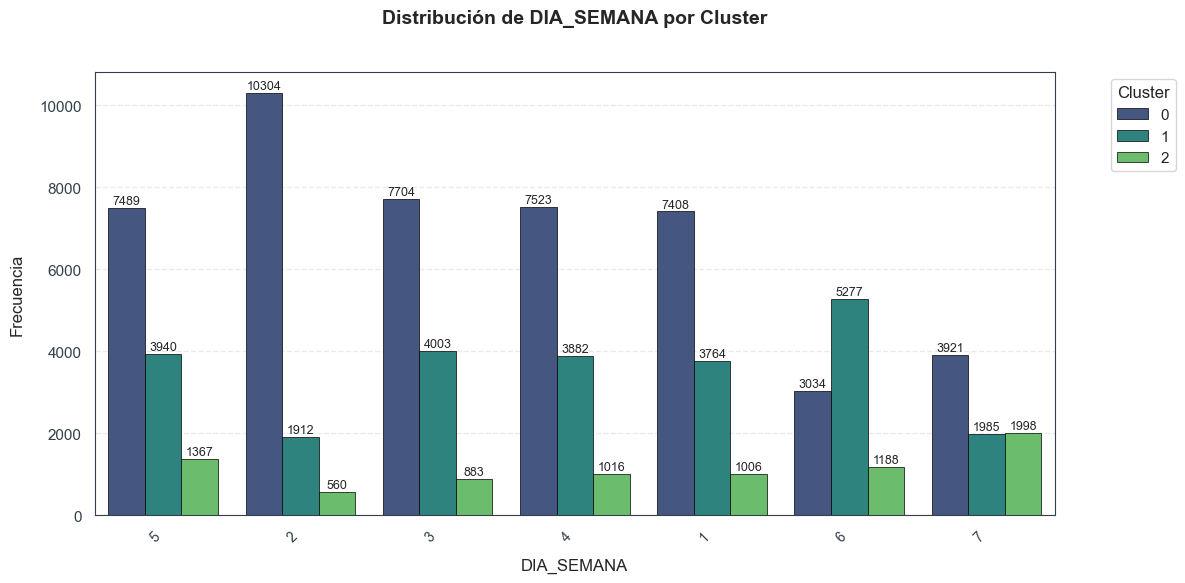

<Figure size 1200x600 with 0 Axes>

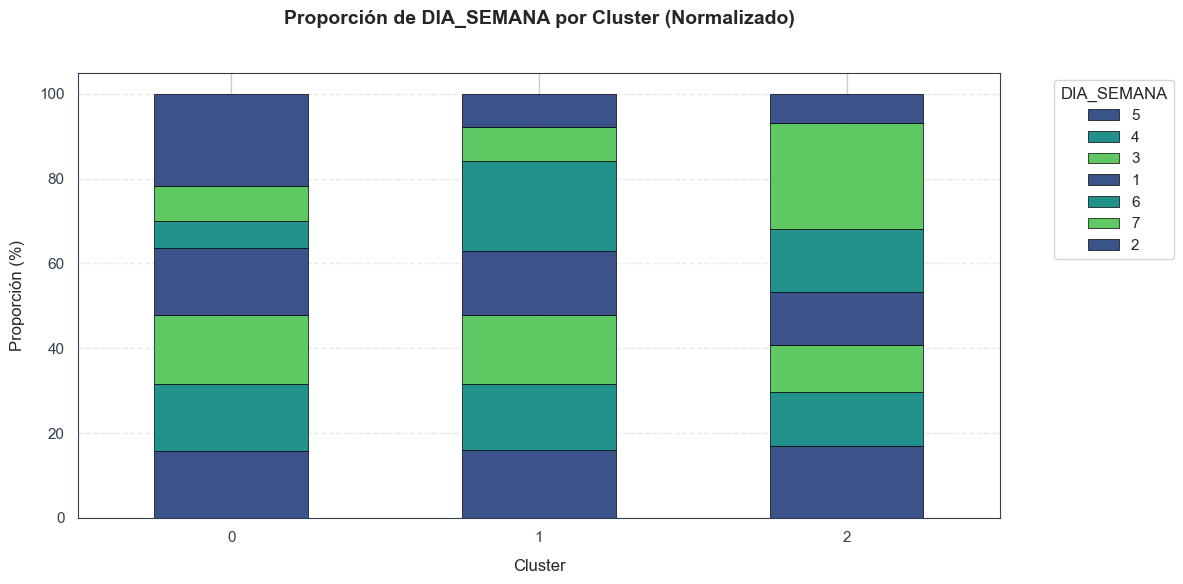

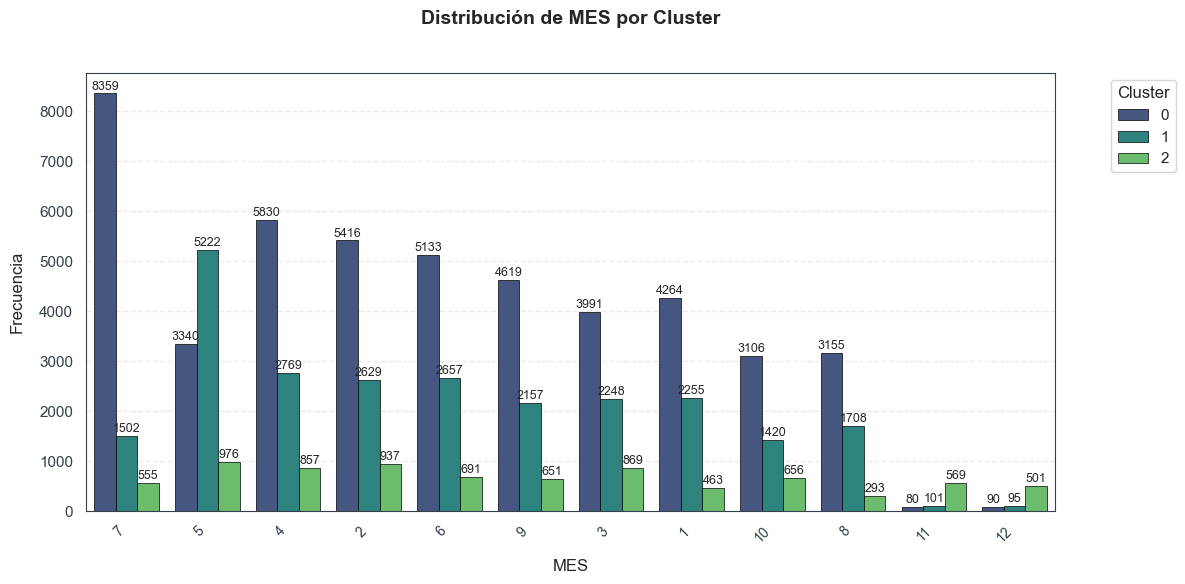

<Figure size 1200x600 with 0 Axes>

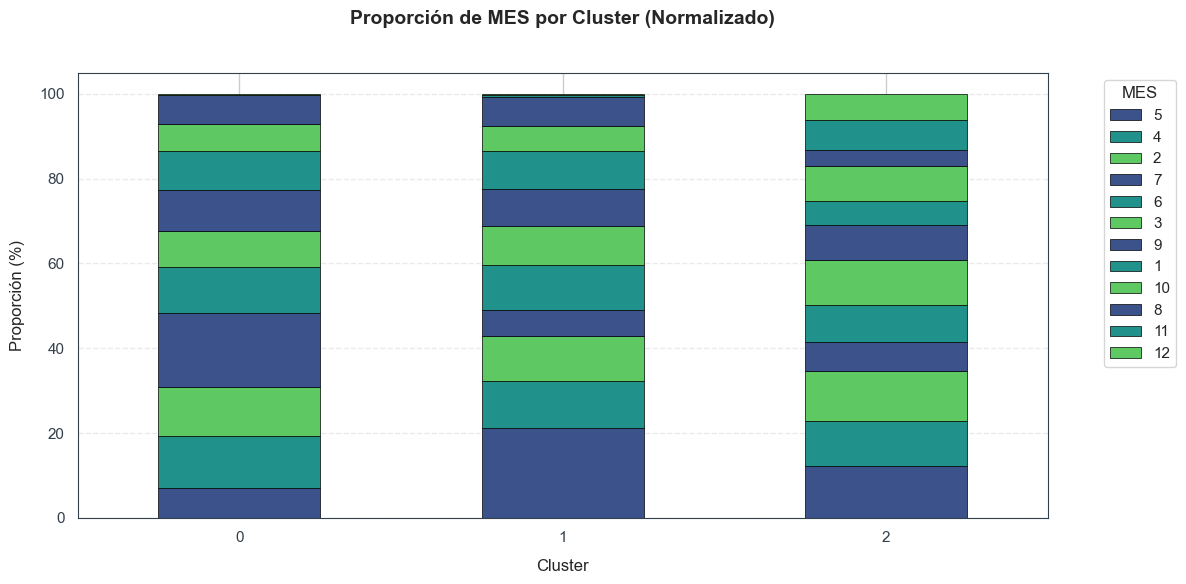

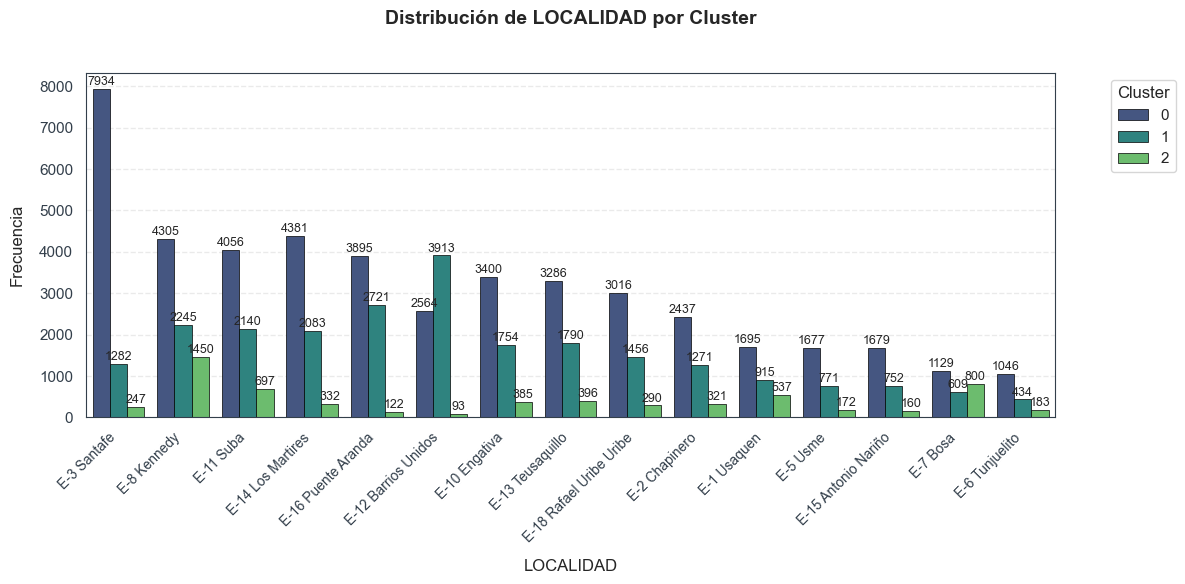

<Figure size 1200x600 with 0 Axes>

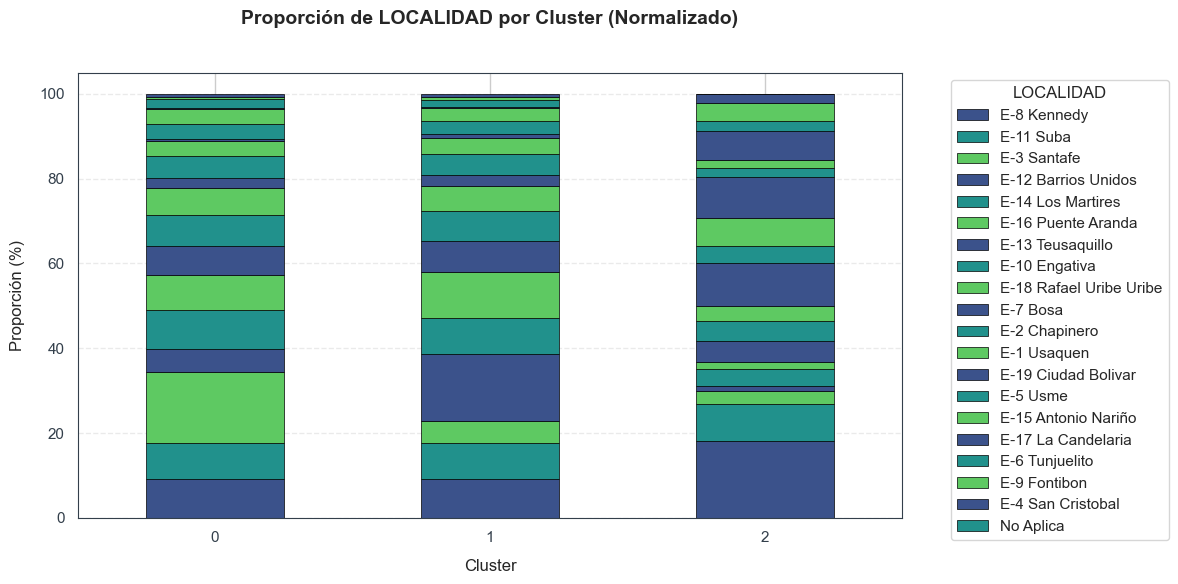

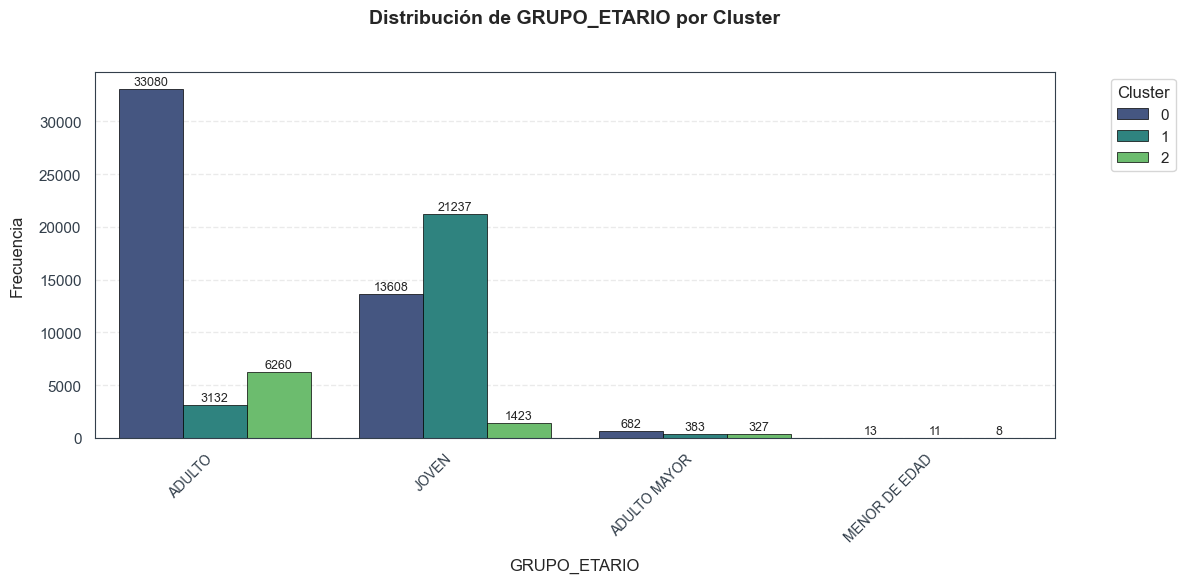

<Figure size 1200x600 with 0 Axes>

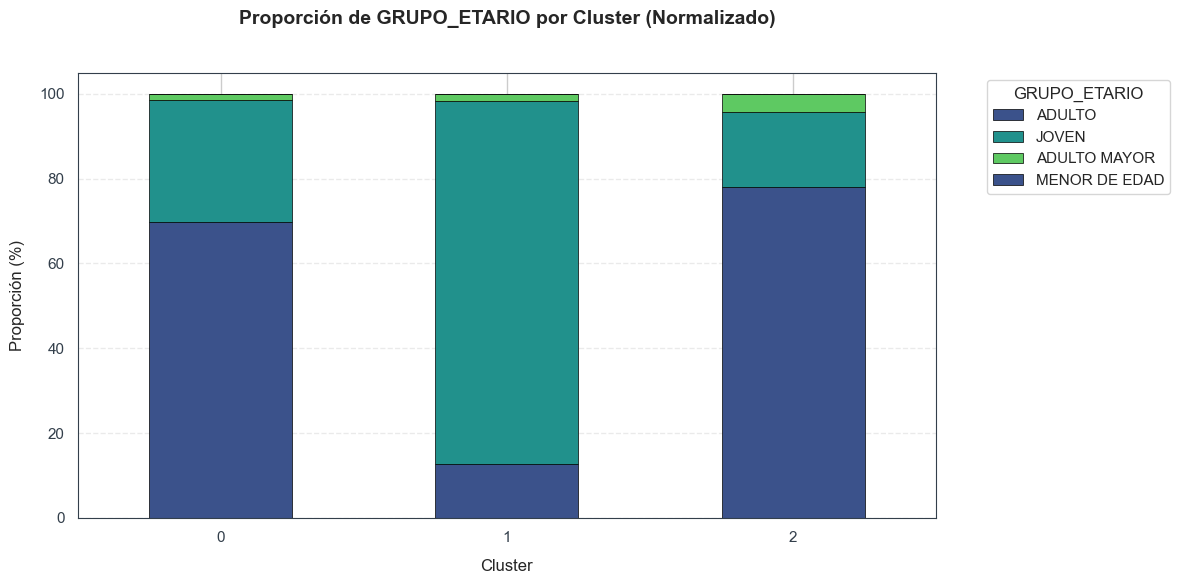

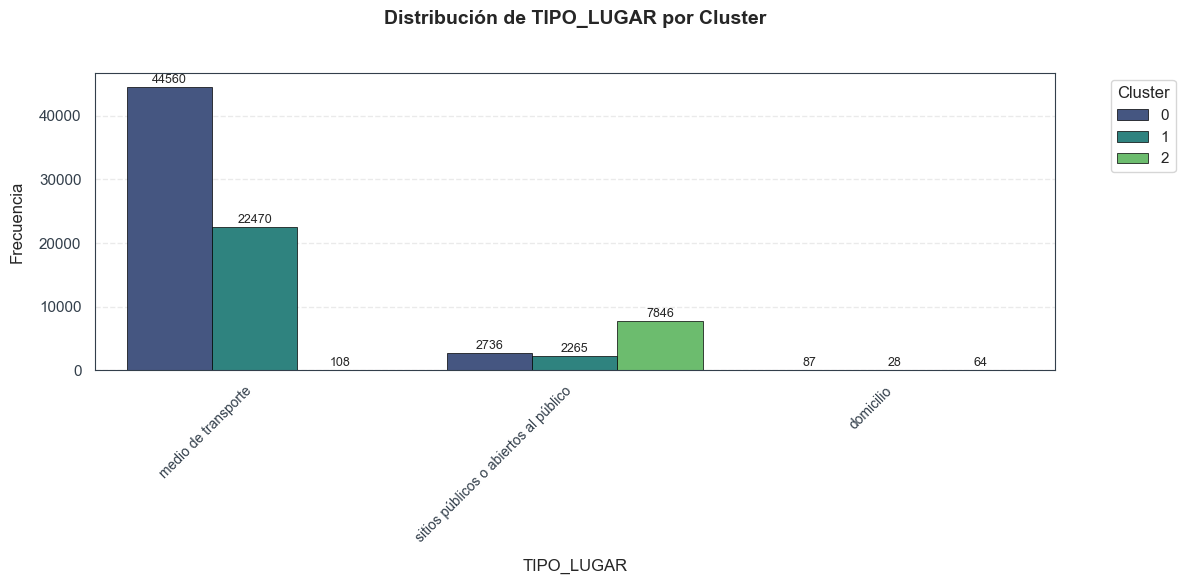

<Figure size 1200x600 with 0 Axes>

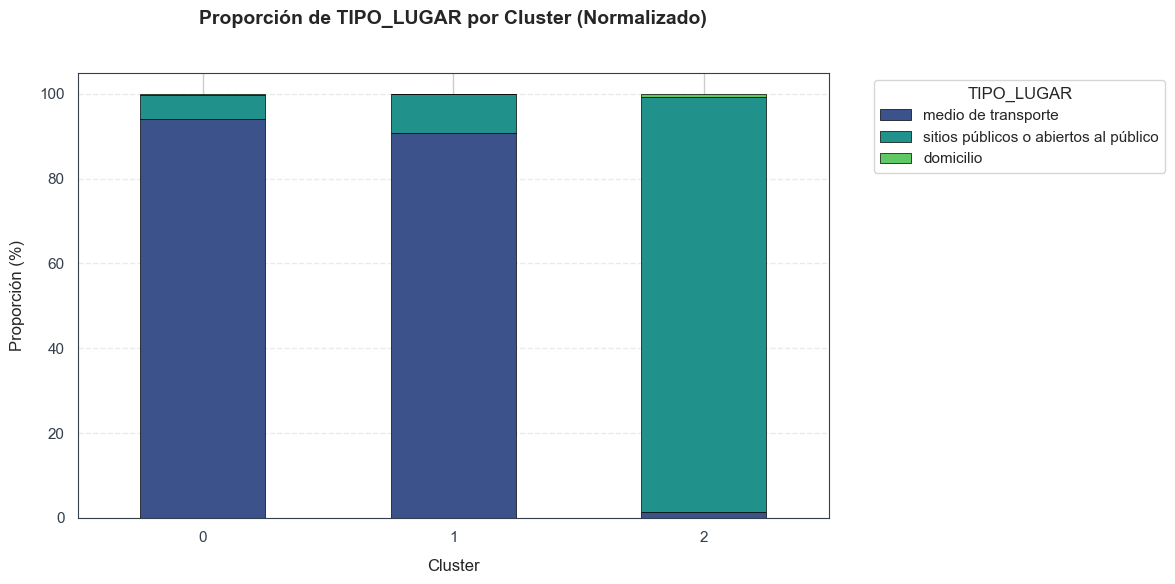

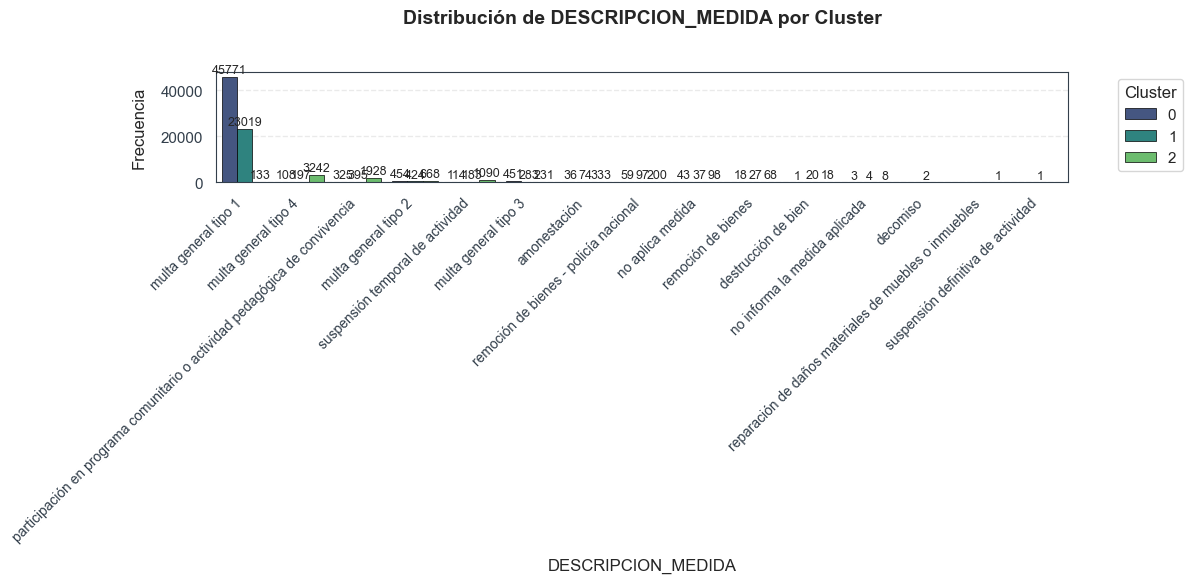

<Figure size 1200x600 with 0 Axes>

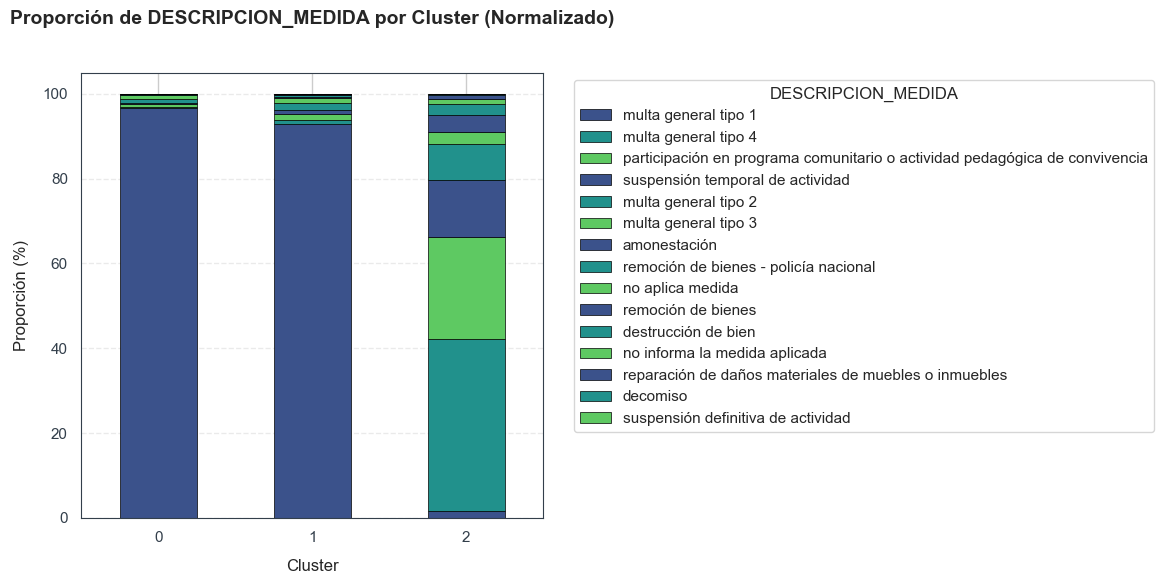

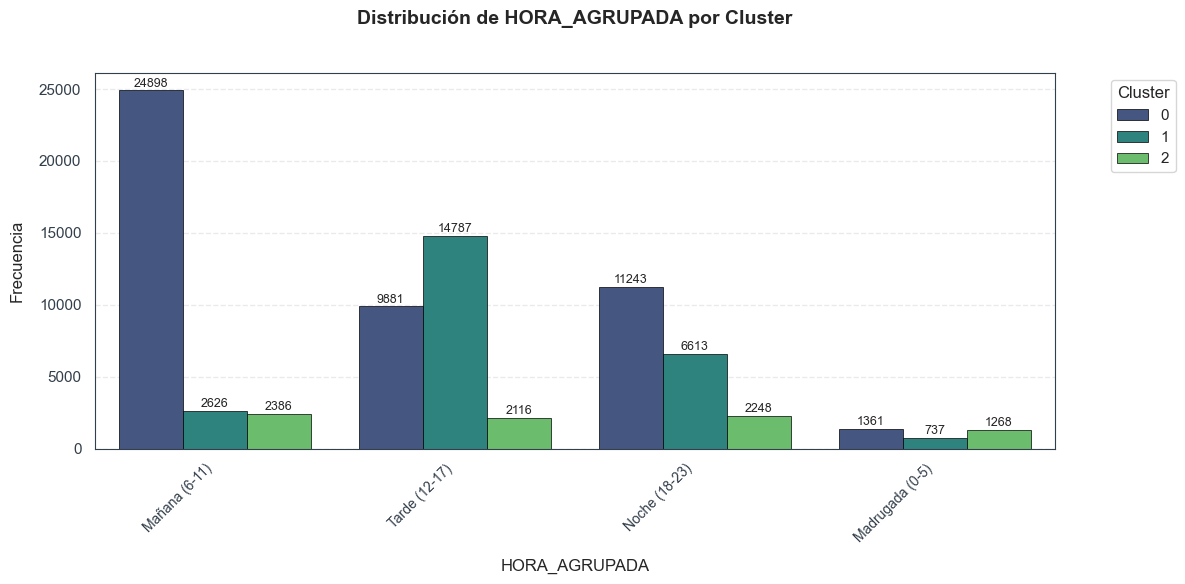

<Figure size 1200x600 with 0 Axes>

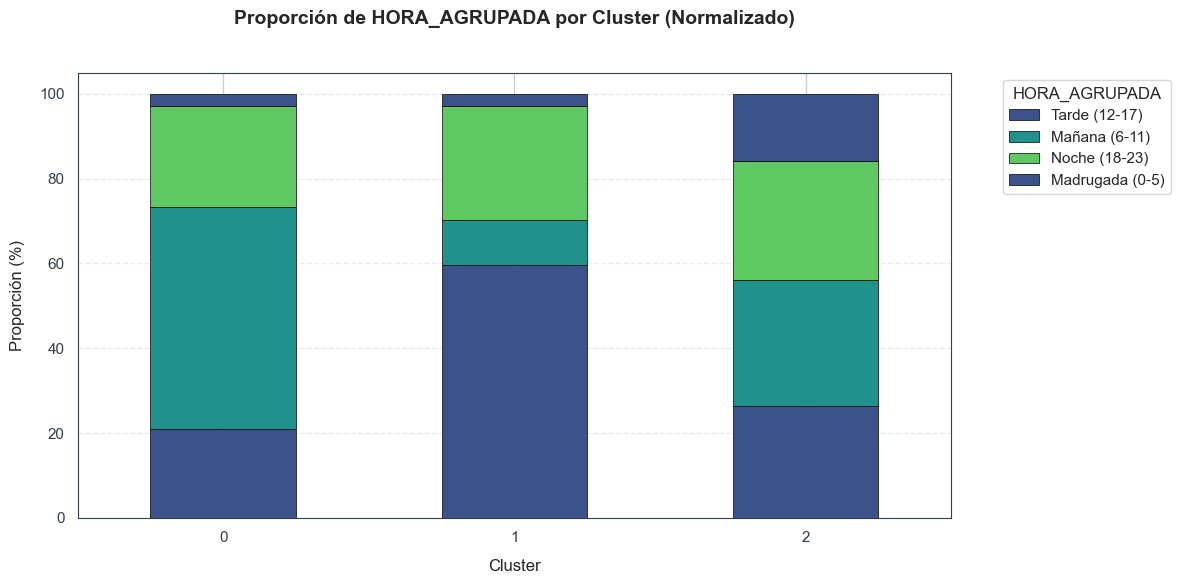

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo corregida
sns.set_style("whitegrid")  # Usar estilo whitegrid de Seaborn
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.edgecolor'] = '#333F4B'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['xtick.color'] = '#333F4B'
plt.rcParams['ytick.color'] = '#333F4B'

# Paleta de colores mejorada
cluster_palette = sns.color_palette("viridis", n_colors=k_optimo)

for col in variables_finales:
    # --------------------------
    # GRÁFICO 1: Countplot mejorado
    # --------------------------
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(data=df, x=col, hue='CLUSTER', 
                      palette=cluster_palette,
                      edgecolor='black', linewidth=0.5,
                      order=df[col].value_counts().iloc[:15].index)  # Mostrar solo top 15 categorías
    
    # Títulos y etiquetas
    plt.title(f'Distribución de {col} por Cluster\n', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel(col, fontsize=12, labelpad=10)
    plt.ylabel('Frecuencia', fontsize=12, labelpad=10)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    
    # Añadir valores en las barras
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center',
                        xytext=(0, 5),
                        textcoords='offset points',
                        fontsize=9)
    
    # Leyenda y grid
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()
    
    # --------------------------
    # GRÁFICO 2: Proporciones normalizadas
    # --------------------------
    plt.figure(figsize=(12, 6))
    
    # Calcular proporciones
    cross_tab = pd.crosstab(df['CLUSTER'], df[col], normalize='index') * 100
    
    # Ordenar por la categoría más frecuente
    cross_tab = cross_tab[cross_tab.mean().sort_values(ascending=False).index]
    
    # Graficar
    cross_tab.plot(kind='bar', stacked=True, 
                  color=cluster_palette,
                  edgecolor='black', linewidth=0.5,
                  figsize=(12, 6))
    
    # Personalización
    plt.title(f'Proporción de {col} por Cluster (Normalizado)\n', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Cluster', fontsize=12, labelpad=10)
    plt.ylabel('Proporción (%)', fontsize=12, labelpad=10)
    plt.xticks(rotation=0)
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

In [80]:
# Proporción de registros por cluster
print("\n➡️ Proporción de registros por cluster:")
proporcion = df['CLUSTER'].value_counts(normalize=True).sort_index()
print(proporcion)



➡️ Proporción de registros por cluster:
CLUSTER
0    0.591076
1    0.308904
2    0.100020
Name: proportion, dtype: float64


In [81]:
# Guardar resultados con clusters
df.to_csv('comparendos_clusterizados.csv', index=False)
print("\n➡️ Archivo 'comparendos_clusterizados.csv' guardado con la columna CLUSTER.")



➡️ Archivo 'comparendos_clusterizados.csv' guardado con la columna CLUSTER.


In [82]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

variables_finales = [
    'COMPORTAMIENTO_CORTO',
    'DIA_SEMANA',
    'MES',
    'LOCALIDAD',
    'GRUPO_ETARIO',
    'TIPO_LUGAR',
    'DESCRIPCION_MEDIDA',
    'HORA_AGRUPADA'
]

# 1. Guardar dataframe clusterizado
df.to_csv('comparendos_clusterizados.csv', index=False)
print("➡️ Archivo 'comparendos_clusterizados.csv' guardado.")

# 2. Carpeta para guardar gráficos y tablas
output_folder = 'resultados_cluster'
os.makedirs(output_folder, exist_ok=True)
gráficos_folder = os.path.join(output_folder, 'graficos')
os.makedirs(gráficos_folder, exist_ok=True)
tablas_folder = os.path.join(output_folder, 'tablas_cruzadas')
os.makedirs(tablas_folder, exist_ok=True)

# 3. Función para acortar textos (ejemplo para TIPO_LUGAR)
def acortar_texto(texto, max_len=20):
    if len(texto) > max_len:
        return texto[:max_len] + "..."
    return texto

# Acortar textos para TIPO_LUGAR y DESCRIPCION_MEDIDA para mejorar gráficos
df['TIPO_LUGAR_CORTO'] = df['TIPO_LUGAR'].apply(acortar_texto)
df['DESCRIPCION_MEDIDA_CORTO'] = df['DESCRIPCION_MEDIDA'].apply(acortar_texto)

# 4. Gráficos mejorados
print("➡️ Generando y guardando gráficos...")

for col in variables_finales:
    plt.figure(figsize=(14, 7))  # Más grande para mejor visualización
    col_graf = col
    if col == 'TIPO_LUGAR':
        col_graf = 'TIPO_LUGAR_CORTO'
    elif col == 'DESCRIPCION_MEDIDA':
        col_graf = 'DESCRIPCION_MEDIDA_CORTO'

    sns.countplot(data=df, x=col_graf, hue='CLUSTER', palette='viridis', order=df[col_graf].value_counts().index)
    plt.title(f'Distribución de {col} por Cluster', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Cantidad', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.legend(title='Cluster')
    plt.tight_layout()
    
    # Guardar gráfico
    graf_path = os.path.join(gráficos_folder, f'countplot_{col}.png')
    plt.savefig(graf_path)
    plt.close()

print(f"➡️ Gráficos guardados en carpeta '{gráficos_folder}'")

# 5. Tablas cruzadas y exportación
print("➡️ Generando tablas cruzadas, guardando CSVs y Excel consolidado...")

with pd.ExcelWriter(os.path.join(tablas_folder, 'tablas_cruzadas_por_cluster.xlsx')) as writer:
    for var in variables_finales:
        print(f"   - Tabla cruzada: {var} vs CLUSTER")
        tabla_cruzada = pd.crosstab(df[var], df['CLUSTER'], normalize='index')
        print(tabla_cruzada)
        
        # Guardar CSV
        csv_path = os.path.join(tablas_folder, f'tabla_cruzada_{var.lower()}.csv')
        tabla_cruzada.to_csv(csv_path)
        
        # Guardar en Excel hoja
        tabla_cruzada.to_excel(writer, sheet_name=var[:31])

print(f"➡️ Tablas cruzadas guardadas en carpeta '{tablas_folder}' y Excel consolidado.")

print("\n✅ ¡Análisis completo exportado correctamente!")


➡️ Archivo 'comparendos_clusterizados.csv' guardado.
➡️ Generando y guardando gráficos...
➡️ Gráficos guardados en carpeta 'resultados_cluster\graficos'
➡️ Generando tablas cruzadas, guardando CSVs y Excel consolidado...
   - Tabla cruzada: COMPORTAMIENTO_CORTO vs CLUSTER
CLUSTER                                     0         1         2
COMPORTAMIENTO_CORTO                                             
Actividad económica sin requisitos   0.059679  0.083397  0.856924
Actividad no registrada              0.051724  0.112069  0.836207
Agresión a autoridades               0.087912  0.120879  0.791209
Agresión física                      0.223881  0.154229  0.621891
Alteración servicios públicos        0.500000  0.000000  0.500000
Amenaza de daño físico               0.354430  0.126582  0.518987
Auspiciar riñas                      0.044444  0.155556  0.800000
Basura fuera de horario              0.363636  0.181818  0.454545
Basura fuera de lugar                0.222222  0.206349  0.571429
C

In [84]:
# Asegúrate de que df contiene las variables ya preprocesadas (sin nulos)
vars_categoricas = ['COMPORTAMIENTO_CORTO', 'DIA_SEMANA', 'MES', 'LOCALIDAD',
                    'GRUPO_ETARIO', 'TIPO_LUGAR', 'DESCRIPCION_MEDIDA', 'HORA_AGRUPADA']

data_categorica = df[vars_categoricas].astype(str)


Costo total del modelo con k=3: 276342.0
Calculando matriz de distancia Hamming... esto puede tomar tiempo
Silhouette Score (distancia Hamming) para k=3: 0.0834


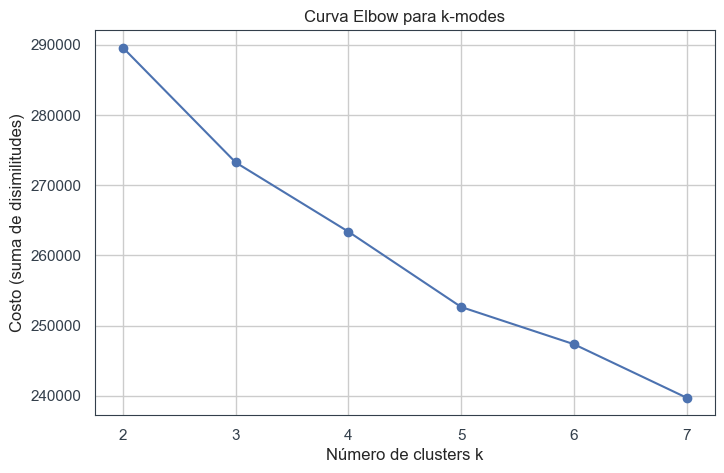

In [85]:
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Asegúrate que data_categorica es un DataFrame o numpy array con solo variables categóricas

# --- 1. Definir función para matriz de distancia Hamming ---
def hamming_distance_matrix(X):
    n = len(X)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            dist = np.sum(X[i] != X[j]) / X.shape[1]
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    return dist_matrix

# --- 2. Evaluar tu modelo actual (con k=3 clusters, por ejemplo) ---

k = 3  # Cambia al número de clusters que usaste
km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
clusters = km.fit_predict(data_categorica)

print(f"Costo total del modelo con k={k}: {km.cost_}")

# --- 3. Calcular Silhouette Score usando distancia Hamming ---

# Convierte data_categorica a numpy array (strings o enteros)
X = data_categorica.values if hasattr(data_categorica, 'values') else data_categorica

# Para datasets grandes, muestrea para que no demore mucho
max_samples = 1000
if len(X) > max_samples:
    np.random.seed(42)
    indices = np.random.choice(len(X), max_samples, replace=False)
    X_sample = X[indices]
    clusters_sample = clusters[indices]
else:
    X_sample = X
    clusters_sample = clusters

print("Calculando matriz de distancia Hamming... esto puede tomar tiempo")
dist_matrix = hamming_distance_matrix(X_sample)

sil_score = silhouette_score(dist_matrix, clusters_sample, metric='precomputed')
print(f"Silhouette Score (distancia Hamming) para k={k}: {sil_score:.4f}")

# --- 4. (Opcional) Curva Elbow para varios k ---

costs = []
Ks = range(2, 8)
for k_i in Ks:
    km_i = KModes(n_clusters=k_i, init='Huang', n_init=5, verbose=0)
    km_i.fit(data_categorica)
    costs.append(km_i.cost_)

plt.figure(figsize=(8,5))
plt.plot(Ks, costs, marker='o')
plt.xlabel('Número de clusters k')
plt.ylabel('Costo (suma de disimilitudes)')
plt.title('Curva Elbow para k-modes')
plt.show()



In [88]:
# --------------------------------------------
# ETAPA 6: Prueba Chi² por localidad antes y después del clustering
# --------------------------------------------

import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
from scipy.stats import chi2_contingency

# Paso 1: Filtrar registros que NO sean "Ingreso indebido a estaciones"
df_filtrado = df[df['COMPORTAMIENTO_CORTO'] != "Ingreso indebido a estaciones"].copy()

# Paso 2: Definir variables para clustering (igual que en el modelo principal)
variables_cluster = [
    'COMPORTAMIENTO_CORTO',
    'DIA_SEMANA',
    'MES',
    'LOCALIDAD',
    'GRUPO_ETARIO',
    'TIPO_LUGAR',
    'DESCRIPCION_MEDIDA',
    'HORA_AGRUPADA'
]

data_categorica = df_filtrado[variables_cluster]

# Paso 3: Aplicar clustering K-Modes con k=3
k = 3
km = KModes(n_clusters=k, init='Huang', n_init=5, random_state=42)
clusters = km.fit_predict(data_categorica)

# Añadir columna de clúster al DataFrame
df_filtrado['CLUSTER'] = clusters

# Paso 4: Generar tablas cruzadas para Chi²
tabla_original = pd.crosstab(df_filtrado['LOCALIDAD'], df_filtrado['COMPORTAMIENTO_CORTO'])
tabla_cluster = pd.crosstab(df_filtrado['LOCALIDAD'], df_filtrado['CLUSTER'])

# Paso 5: Pruebas Chi²
chi2_ori, p_ori, _, _ = chi2_contingency(tabla_original)
chi2_clu, p_clu, _, _ = chi2_contingency(tabla_cluster)

# Paso 6: Mostrar resultados
print("📊 Prueba de independencia Chi-cuadrado – Comparación por LOCALIDAD")
print(f"➡ Antes del clustering:")
print(f"   Chi² = {chi2_ori:.2f}, p-valor = {p_ori:.4f}")
if p_ori < 0.05:
    print("   ✅ Existe una asociación significativa entre COMPORTAMIENTO y LOCALIDAD.")
else:
    print("   ⚠️ No se encontró asociación significativa entre COMPORTAMIENTO y LOCALIDAD.")

print(f"\n➡ Después del clustering (con datos sin conducta dominante):")
print(f"   Chi² = {chi2_clu:.2f}, p-valor = {p_clu:.4f}")
if p_clu < 0.05:
    print("   ✅ Los clústeres también presentan relación significativa con la LOCALIDAD.")
else:
    print("   ⚠️ Los clústeres no muestran una relación significativa con la LOCALIDAD.")


📊 Prueba de independencia Chi-cuadrado – Comparación por LOCALIDAD
➡ Antes del clustering:
   Chi² = 31964.11, p-valor = 0.0000
   ✅ Existe una asociación significativa entre COMPORTAMIENTO y LOCALIDAD.

➡ Después del clustering (con datos sin conducta dominante):
   Chi² = 10606.99, p-valor = 0.0000
   ✅ Los clústeres también presentan relación significativa con la LOCALIDAD.


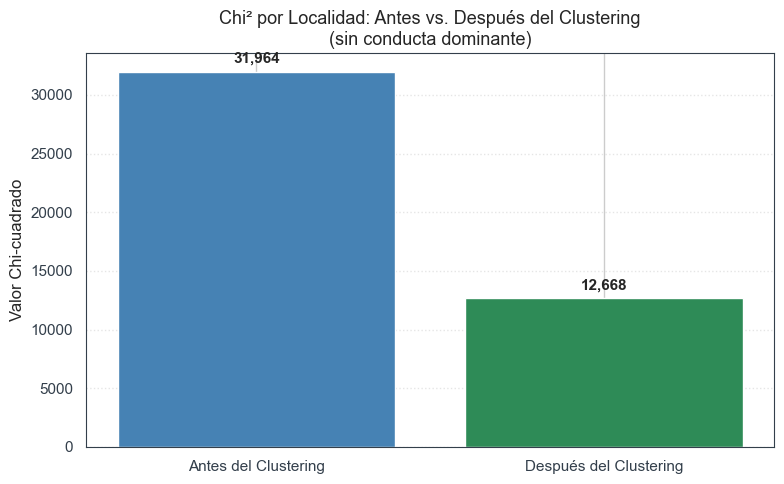

In [89]:
import matplotlib.pyplot as plt

# Datos reales
etapas = ['Antes del Clustering', 'Después del Clustering']
chi2_values = [31964.11, 12668.09]

# Crear gráfica
plt.figure(figsize=(8, 5))
bars = plt.bar(etapas, chi2_values, color=['steelblue', 'seagreen'])

# Etiquetas encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{yval:,.0f}', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Chi² por Localidad: Antes vs. Después del Clustering\n(sin conducta dominante)', fontsize=13)
plt.ylabel('Valor Chi-cuadrado', fontsize=12)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


In [90]:
# Ver la distribución de COMPORTAMIENTO_CORTO por LOCALIDAD, sin el comportamiento dominante
tabla_sin_dominante = pd.crosstab(df_filtrado['LOCALIDAD'], df_filtrado['COMPORTAMIENTO_CORTO'])

# Ordenar columnas por la suma total descendente para ver los más frecuentes
tabla_sin_dominante = tabla_sin_dominante.loc[:, tabla_sin_dominante.sum().sort_values(ascending=False).index]

# Mostrar los primeros comportamientos más frecuentes por localidad
tabla_sin_dominante.head(10)


COMPORTAMIENTO_CORTO,Ingreso indebido estaciones,Necesidades fisiológicas en público,Irrespeto autoridad,Resistencia a la medida,Actividad económica sin requisitos,Obstrucción cicloruta,Incumplimiento de horarios,Obstrucción movilidad,Ocupación indebida espacio público,Agresión física,...,Uso indebido de emergencia,Riesgo vida e integridad,Alteración servicios públicos,Perturbación vecinal,Falta de registro IMEI,Obstrucción autoridad,Transporte inadecuado de escombros,Falta de refrigeración,Daño al espacio público,Sobrecupo
LOCALIDAD,,,,,,,,,,,,,,,,,,,,,
E-1 Usaquen,2365,358,87,102,45,68,18,40,4,10,...,0,0,0,2,0,0,0,0,0,0
E-10 Engativa,4959,111,63,83,102,36,67,8,21,19,...,2,0,0,0,0,0,0,0,0,0
E-11 Suba,5674,223,266,79,77,122,101,122,67,10,...,1,0,0,0,0,0,0,0,0,0
E-12 Barrios Unidos,6196,72,133,21,7,4,4,108,4,6,...,0,0,0,0,0,0,0,0,0,0
E-13 Teusaquillo,4918,329,61,47,16,3,6,47,13,6,...,0,0,1,0,0,0,0,1,0,0
E-14 Los Martires,6243,176,81,63,36,0,8,94,41,3,...,0,0,0,0,0,0,0,0,0,0
E-15 Antonio Nariño,2369,77,62,25,14,0,7,3,7,4,...,0,0,0,0,0,0,0,0,0,0
E-16 Puente Aranda,6506,81,35,72,3,0,1,21,0,4,...,0,1,0,0,0,0,0,0,0,0
E-17 La Candelaria,56,475,59,15,26,0,5,0,0,3,...,0,0,0,0,0,0,0,0,0,0


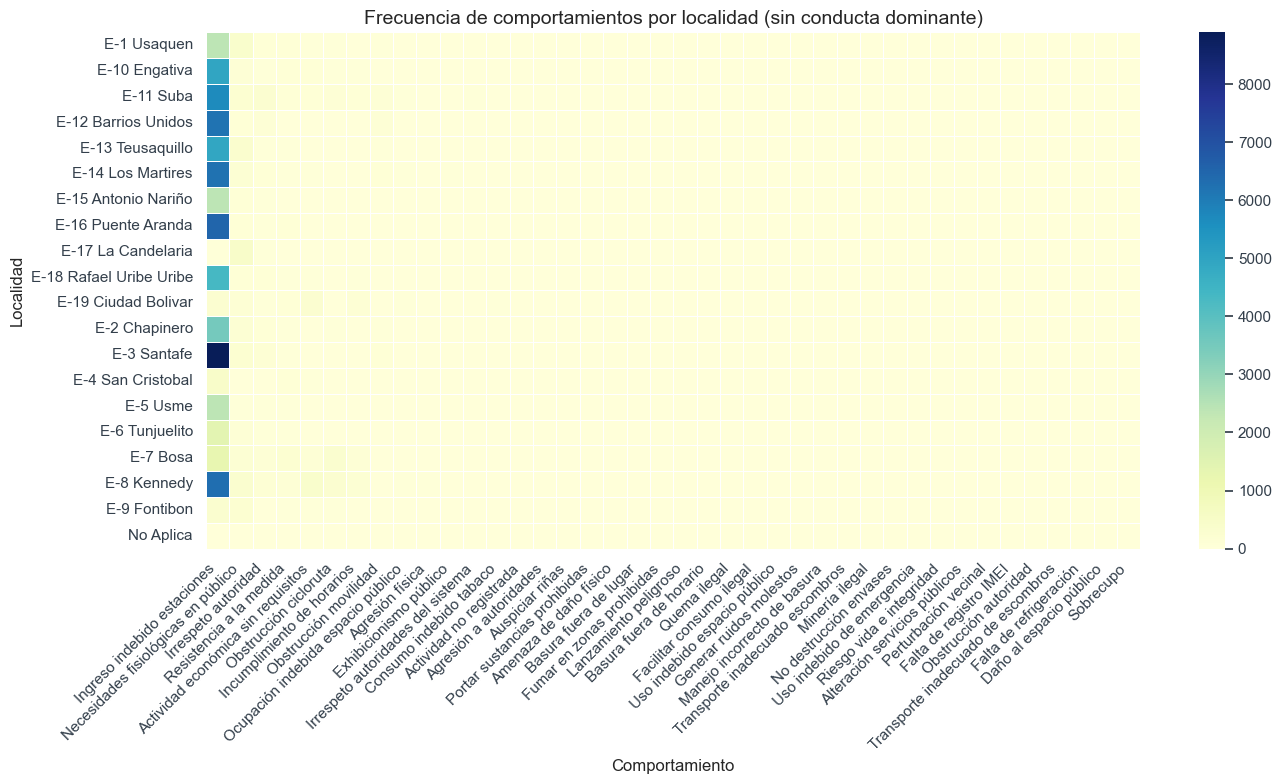

In [95]:
plt.figure(figsize=(14, 8))
sns.heatmap(tabla_sin_dominante,  # usa el nombre correcto
            cmap='YlGnBu',
            annot=False,
            linewidths=0.5)

plt.title("Frecuencia de comportamientos por localidad (sin conducta dominante)", fontsize=14)
plt.xlabel("Comportamiento")
plt.ylabel("Localidad")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Guarda la imagen antes de mostrarla
plt.savefig("comportamientos_sin_dominante.png", dpi=300, bbox_inches='tight')

# Luego muestra la gráfica
plt.show()
